In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("E:/Userfiles/Download/Churn.csv")

In [3]:
df

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [5]:
df1 = df.copy()
df1["day.charge"] = df1["day.charge"].astype("float64")
df1["eve.mins"]= df1["eve.mins"].astype("float64")

In [6]:
df1.isnull().sum()

Unnamed: 0         0
state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [7]:
df1.isnull().mean() * 100

Unnamed: 0        0.00
state             0.00
area.code         0.00
account.length    0.00
voice.plan        0.00
voice.messages    0.00
intl.plan         0.00
intl.mins         0.00
intl.calls        0.00
intl.charge       0.00
day.mins          0.00
day.calls         0.00
day.charge        0.14
eve.mins          0.48
eve.calls         0.00
eve.charge        0.00
night.mins        0.00
night.calls       0.00
night.charge      0.00
customer.calls    0.00
churn             0.00
dtype: float64

<Figure size 1000x600 with 0 Axes>

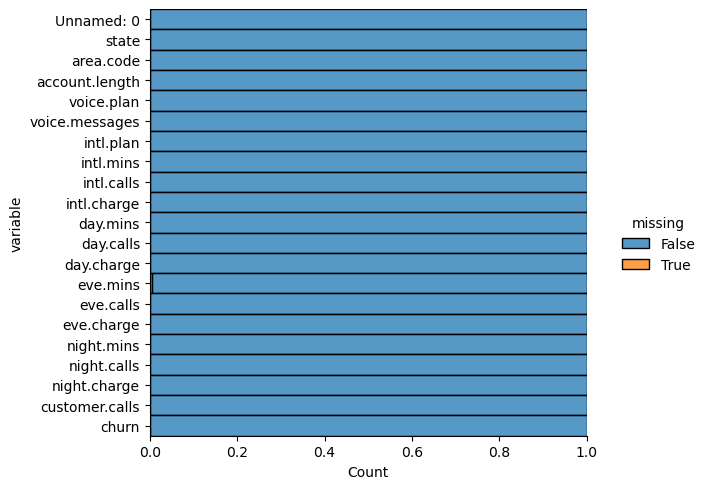

In [8]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df1.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [9]:
!pip install missingno

In [9]:
import missingno as msno


<AxesSubplot:>

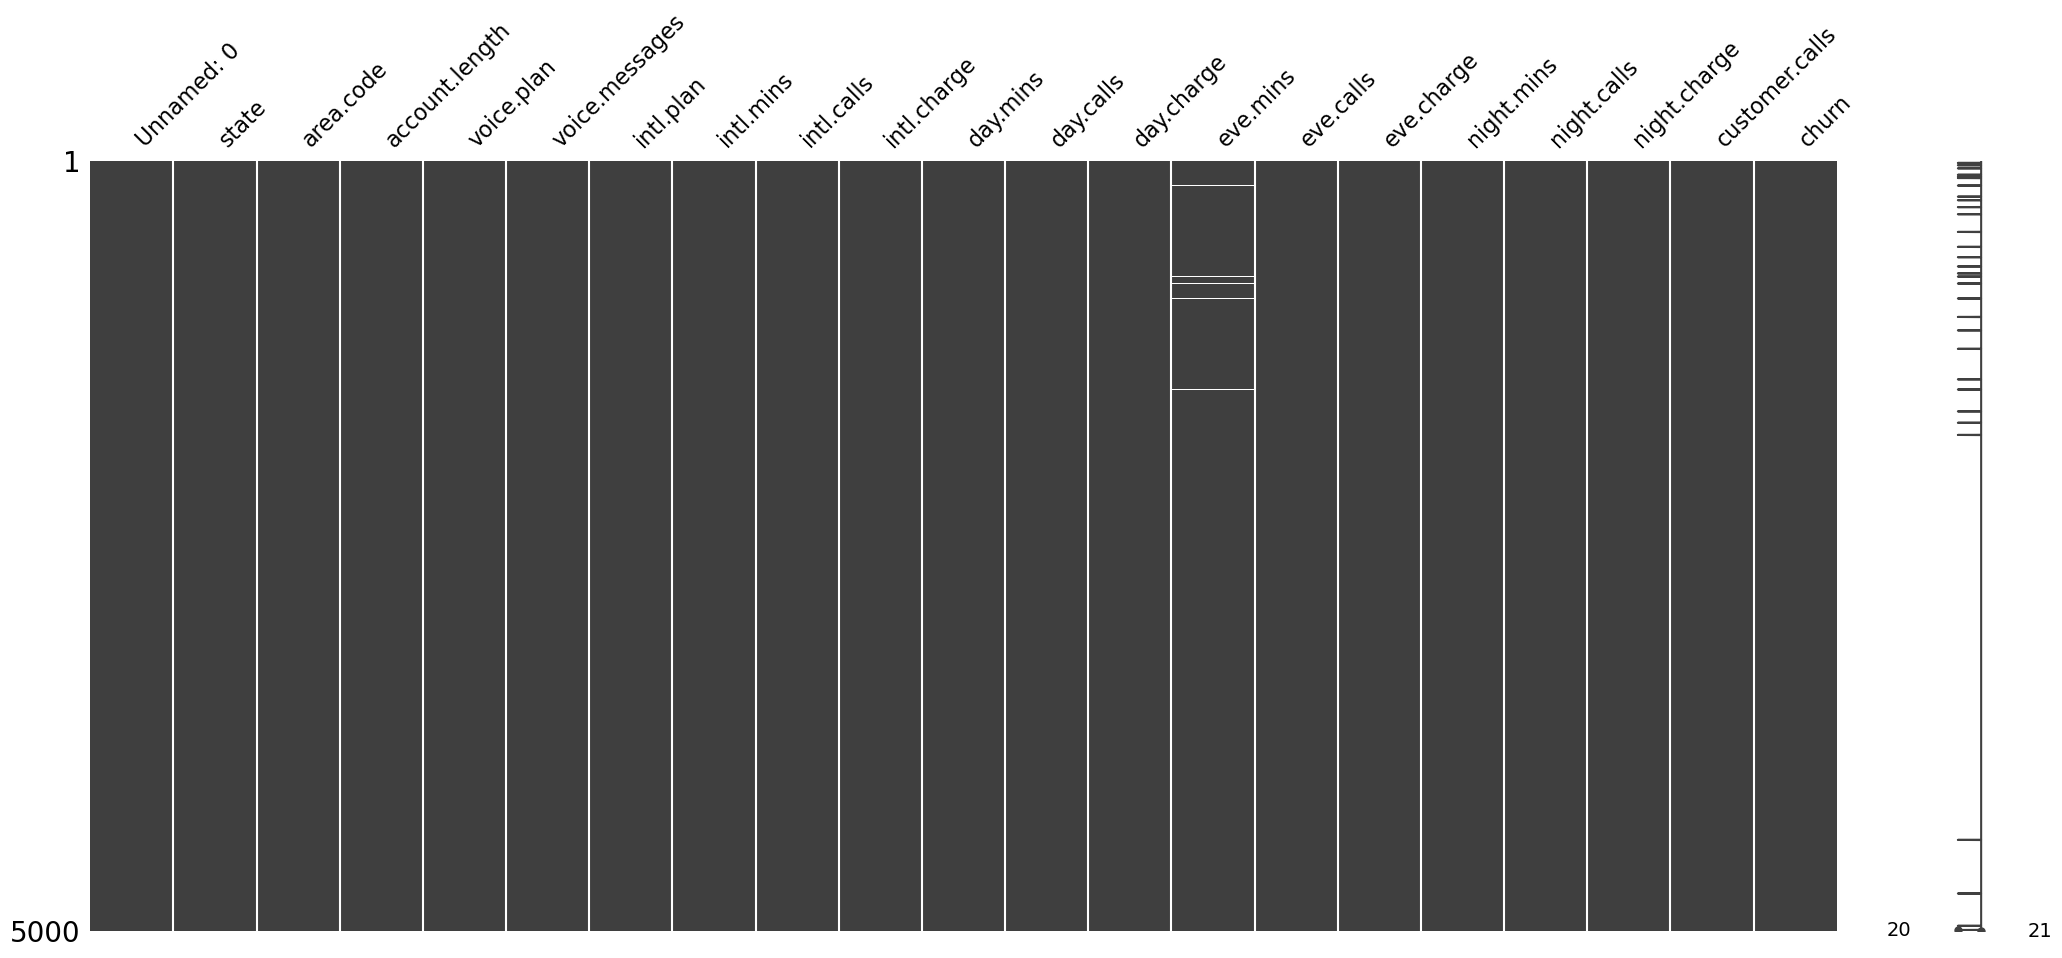

In [11]:
msno.matrix(df1)

In [8]:
df1.dropna(inplace = True)

In [ ]:
# df['salary'] = df['salary'].fillna(df['salary'].mode()[0])

##Filling missing values

In [9]:
df1.shape

(4969, 21)

In [10]:
df1.isnull().sum()

Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [11]:
df1.duplicated().sum()

0

In [12]:
df1.describe()

,Unnamed: 0,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000
mean,2508.523244,100.206681,7.754880,10.264198,4.433085,2.771851,180.306178,100.021936,30.652604,200.617368,100.174884,17.052695,200.434675,99.954518,9.019670,1.571946
std,1439.760538,39.695476,13.545738,2.761996,2.459495,0.745672,53.931206,19.835965,9.168275,50.550590,19.833572,4.296784,50.528158,19.959015,2.273776,1.307458
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1265.000000,73.000000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.400000,87.000000,14.140000,167.100000,87.000000,7.520000,1.000000
50%,2512.000000,100.000000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,3754.000000,127.000000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,113.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,5000.000000,243.000000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [13]:
df1

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [14]:
list(df1.columns)

['Unnamed: 0',
 'state',
 'area.code',
 'account.length',
 'voice.plan',
 'voice.messages',
 'intl.plan',
 'intl.mins',
 'intl.calls',
 'intl.charge',
 'day.mins',
 'day.calls',
 'day.charge',
 'eve.mins',
 'eve.calls',
 'eve.charge',
 'night.mins',
 'night.calls',
 'night.charge',
 'customer.calls',
 'churn']

In [15]:
df1.drop(df1.columns[[0]], axis=1, inplace=True)
df1

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


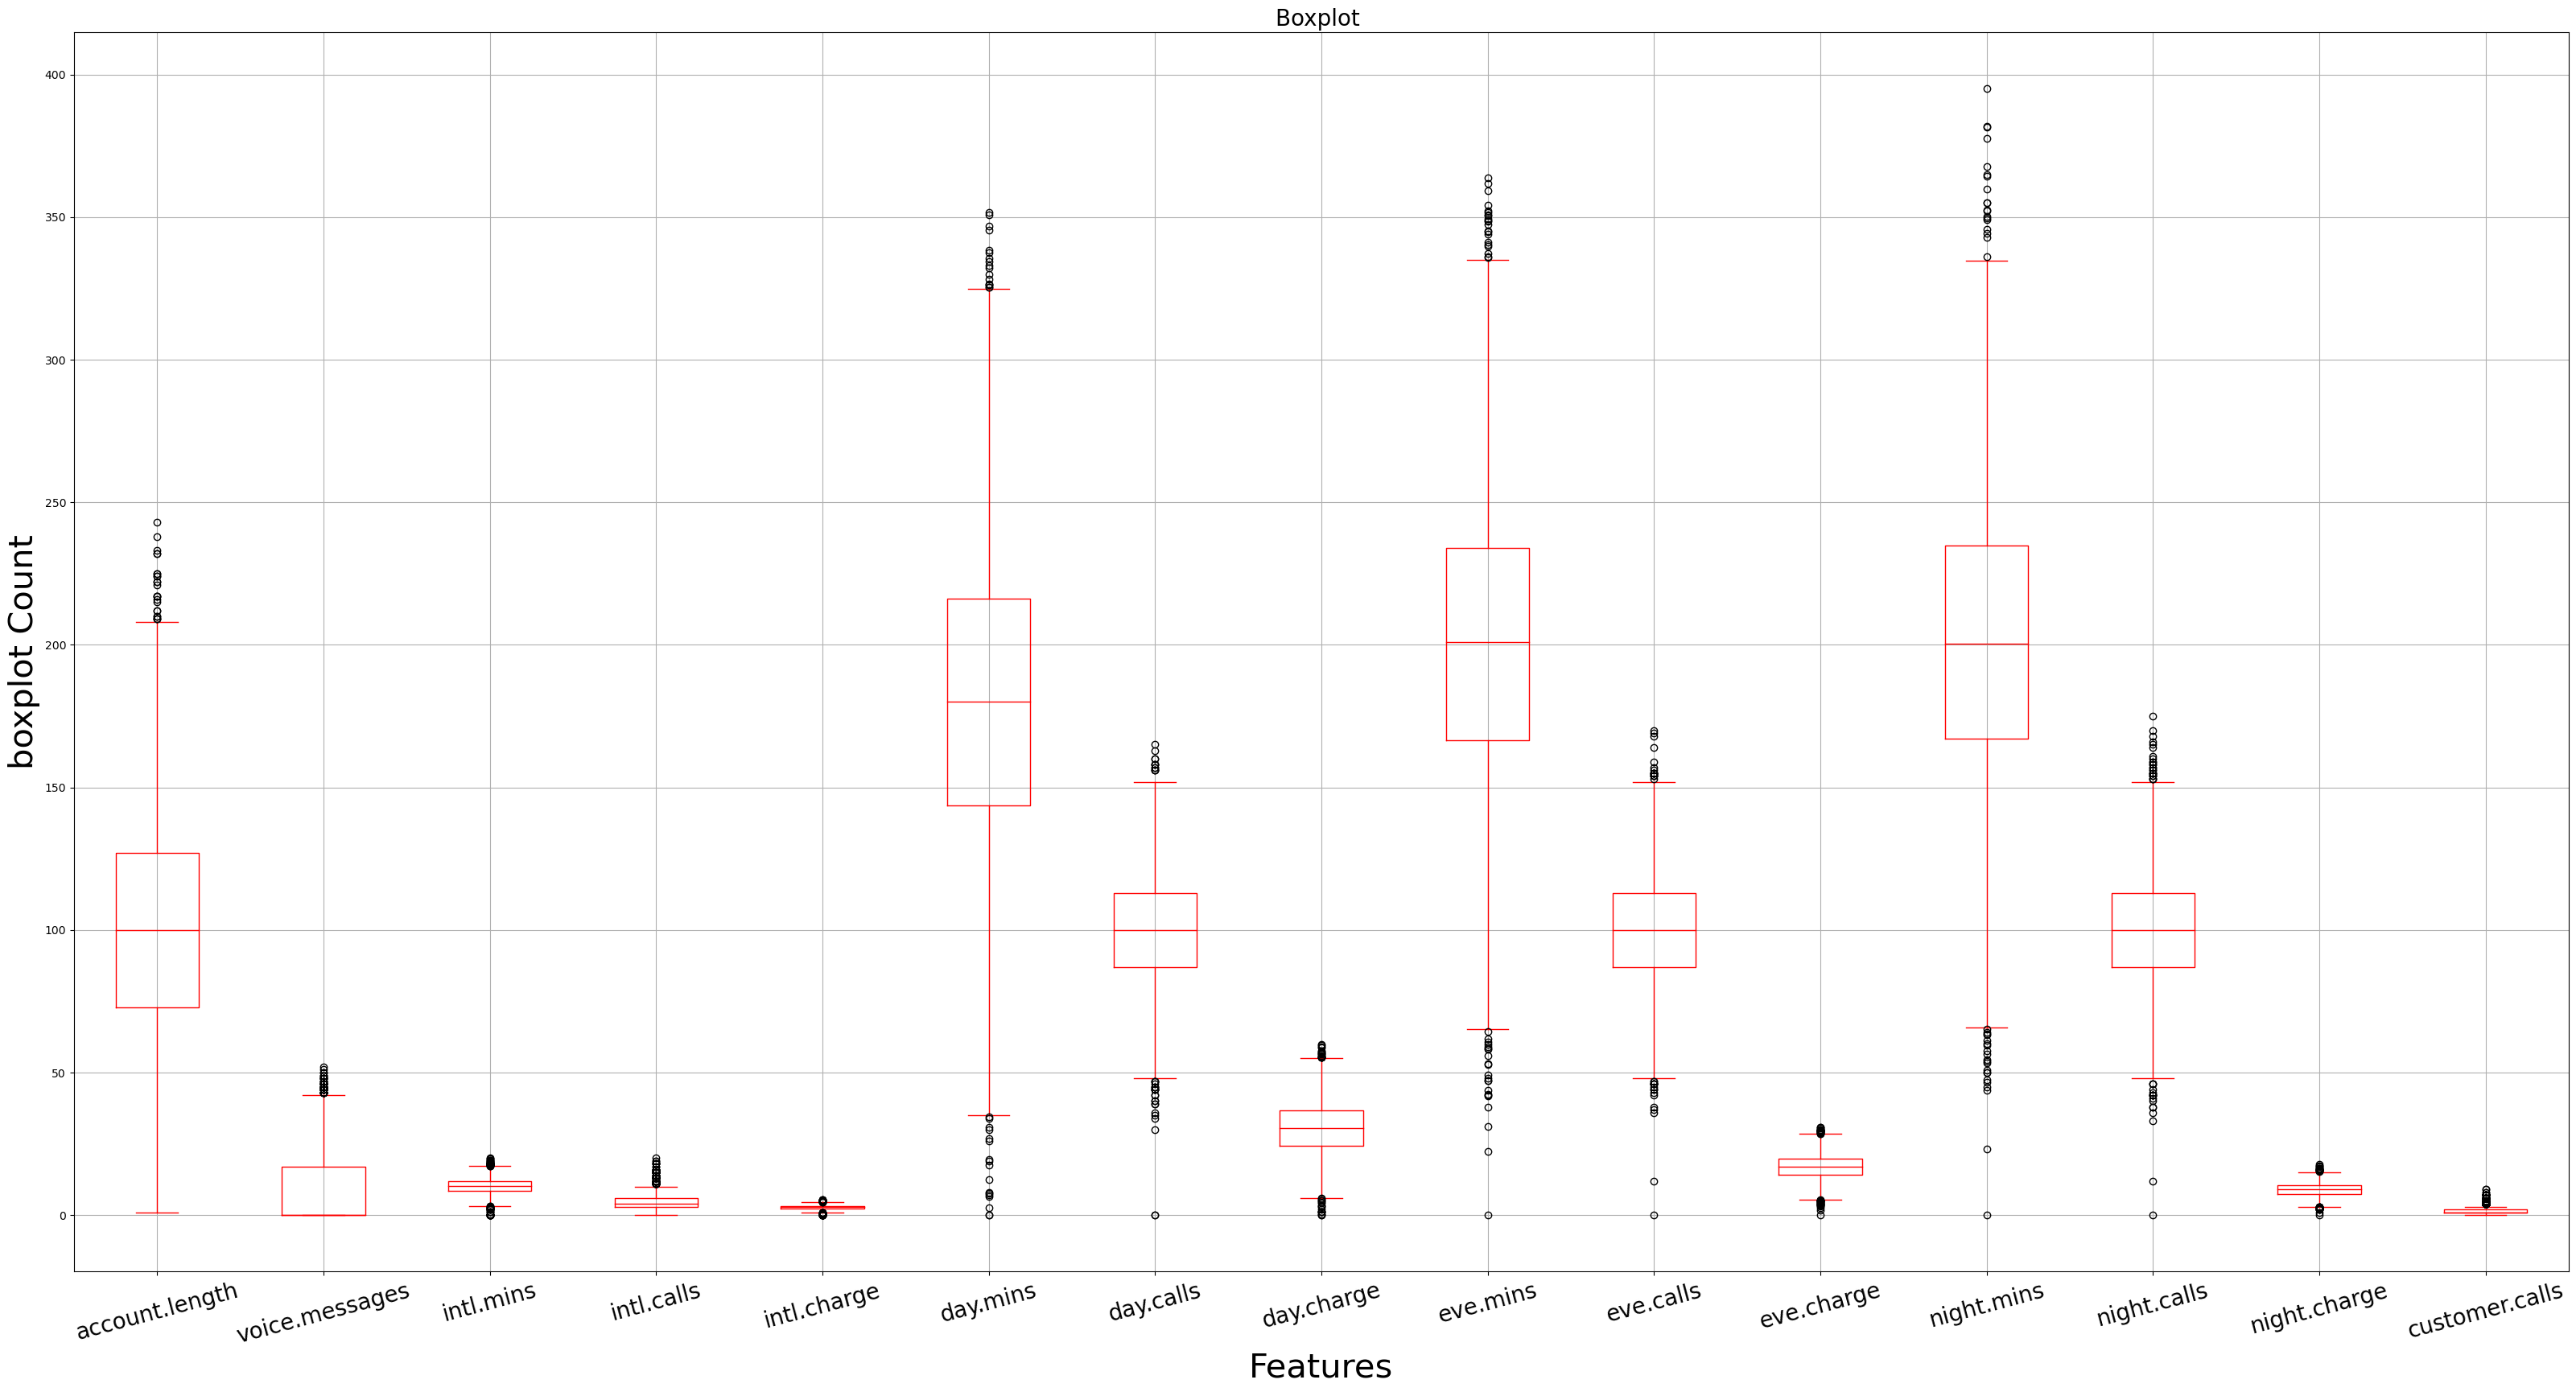

In [18]:
plt.figure(figsize=(40,20))
df1.boxplot(color = "red")
plt.xlabel('Features', fontsize= 30)
plt.ylabel('boxplot Count', fontsize= 30)
plt.title("Boxplot ",fontsize= 20)
plt.xticks(rotation=15,fontsize=20)
plt.show()

In [1]:
#Outlier Treatment
#fare_mean = df['Fare'].mean()
#fare_std = df['Fare'].std()
#low= fare_mean -(3 * fare_std)
#high= fare_mean + (3 * fare_std)
#fare_outliers = df[(df['Fare'] < low) | (df['Fare'] > high)]
#fare_outliers.head()

##Fare = Column name (3 - SD)

In [ ]:
#Capping outlier

#Q1 = df['Fare'].quantile(0.25)
#Q3 = df['Fare'].quantile(0.75)
#IQR = Q3 - Q1
#whisker_width = 1.5
#lower_whisker = Q1 -(whisker_width*IQR)
#upper_whisker = Q3 + whisker_width*IQR)
#df['Fare']=np.where(df['Fare']>upper_whisker,upper_whisker,np.where(df['Fare']<lower_whisker,lower_whisker,df['Fare']))

#(IQR)

In [ ]:
#Filling outliers with median, mode

#median = df.loc[df['Age']<75, 'Age'].median()
#df.loc[df.Age > 75, 'Age'] = np.nan
#df.fillna(median,inplace=True)


#mode = df.loc[df['Age']<75, 'Age'].mode()
#df.loc[df.Age > 75, 'Age'] = np.nan
#df.fillna(mode,inplace=True)


In [21]:
df1.nunique()

state               51
area.code            3
account.length     218
voice.plan           2
voice.messages      48
intl.plan            2
intl.mins          170
intl.calls          21
intl.charge        170
day.mins          1957
day.calls          123
day.charge        1957
eve.mins          1875
eve.calls          126
eve.charge        1655
night.mins        1849
night.calls        131
night.charge      1028
customer.calls      10
churn                2
dtype: int64

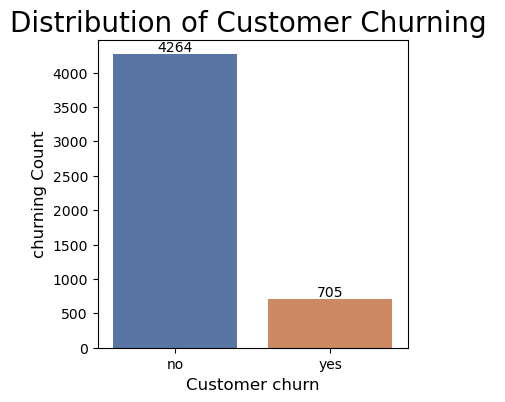

In [22]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(x = df1.churn,palette='deep',ax=ax)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Customer churn', fontsize= 12)
plt.ylabel('churning Count', fontsize= 12)
plt.title("Distribution of Customer Churning ",fontsize= 20)
plt.show()



In [23]:
churn = df1["churn"].value_counts()
churn

no     4264
yes     705
Name: churn, dtype: int64

In [24]:
churned= {
    'Churn':["not_churned","churned"],
    'Count' :[4264,705]
          }
f = pd.DataFrame(churned)


In [25]:
f

,Churn,Count
0,not_churned,4264
1,churned,705


In [26]:
f['Percentage']=np.round((f['Count']/f['Count'].sum())*100)

In [27]:
f

,Churn,Count,Percentage
0,not_churned,4264,86.0
1,churned,705,14.0


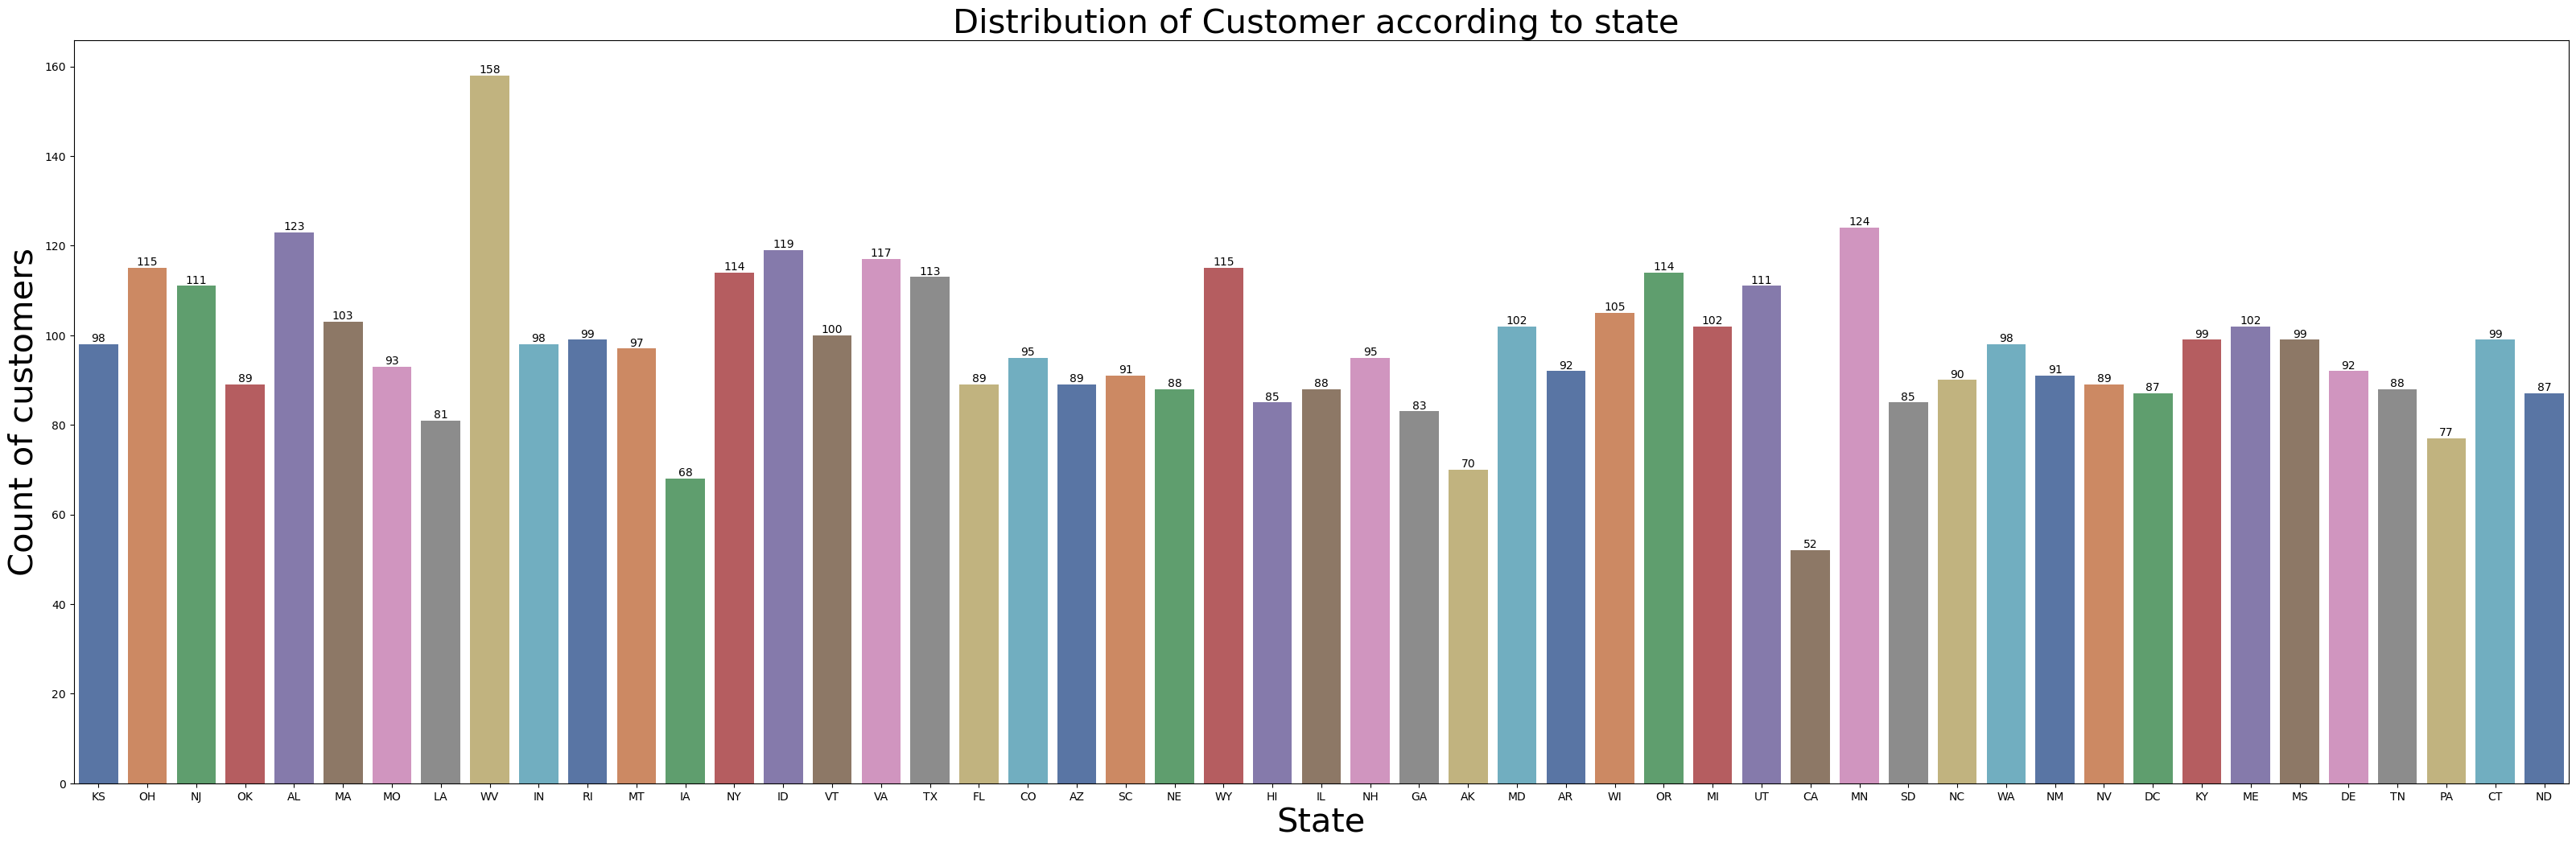

In [28]:
fig, ax = plt.subplots(figsize=(40,12))

sns.countplot(x = df1.state,palette='deep',ax=ax)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('State', fontsize= 30)
plt.ylabel('Count of customers', fontsize= 30)
plt.title("Distribution of Customer according to state ",fontsize= 30)
plt.show()



In [29]:
pd.set_option('display.max_columns', None)
state_cust=df1.state.value_counts()
pd.DataFrame(state_cust).T

,WV,MN,AL,ID,VA,OH,WY,OR,NY,TX,UT,NJ,WI,MA,MI,ME,MD,VT,KY,MS,CT,RI,IN,WA,KS,MT,CO,NH,MO,DE,AR,SC,NM,NC,AZ,FL,NV,OK,TN,IL,NE,DC,ND,SD,HI,GA,LA,PA,AK,IA,CA
state,158,124,123,119,117,115,115,114,114,113,111,111,105,103,102,102,102,100,99,99,99,99,98,98,98,97,95,95,93,92,92,91,91,90,89,89,89,89,88,88,88,87,87,85,85,83,81,77,70,68,52


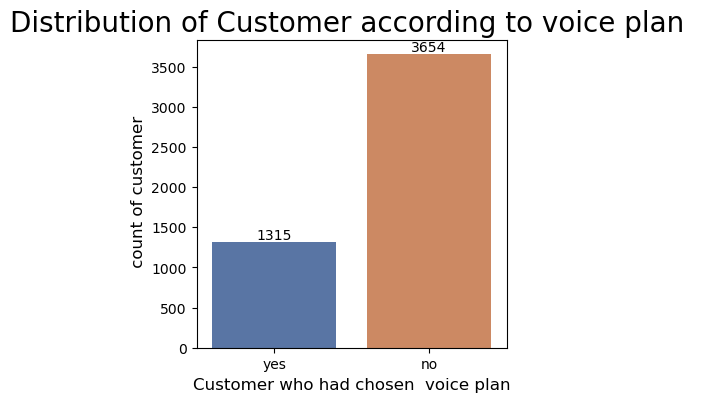

In [30]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(x = df1['voice.plan'],palette='deep')
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Customer who had chosen  voice plan', fontsize= 12)
plt.ylabel(' count of customer', fontsize= 12)
plt.title("Distribution of Customer according to voice plan ",fontsize= 20)
plt.show()

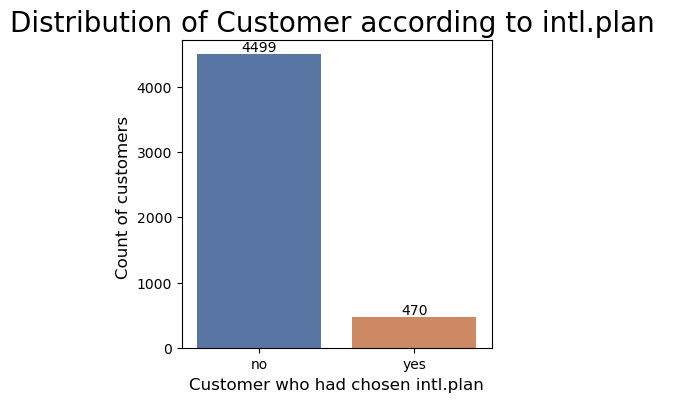

In [31]:

fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(x = df1['intl.plan'],palette='deep')
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Customer who had chosen intl.plan', fontsize= 12)
plt.ylabel('Count of customers ', fontsize= 12)
plt.title("Distribution of Customer according to intl.plan ",fontsize= 20)
plt.show()

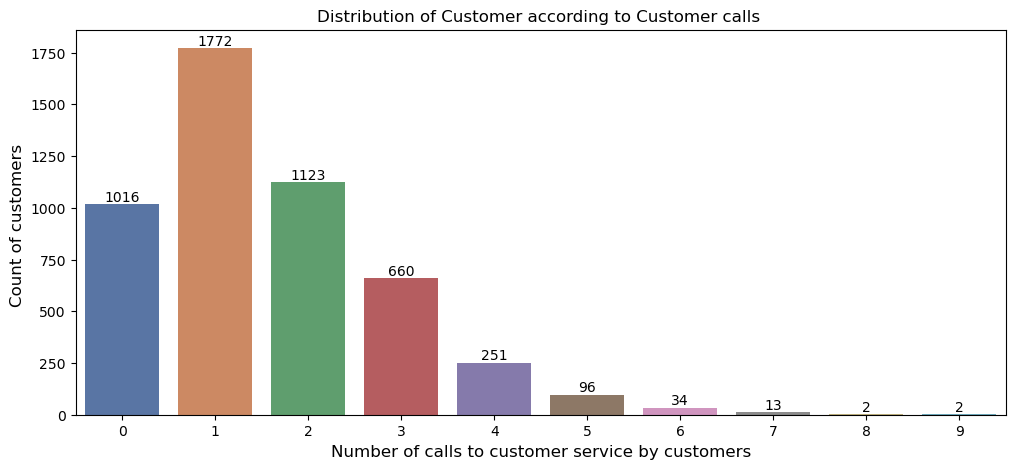

In [32]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x = df1['customer.calls'],palette='deep')
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Number of calls to customer service by customers', fontsize= 12)
plt.ylabel('Count of customers ', fontsize= 12)
plt.title("Distribution of Customer according to Customer calls ",fontsize= 12)
plt.show()

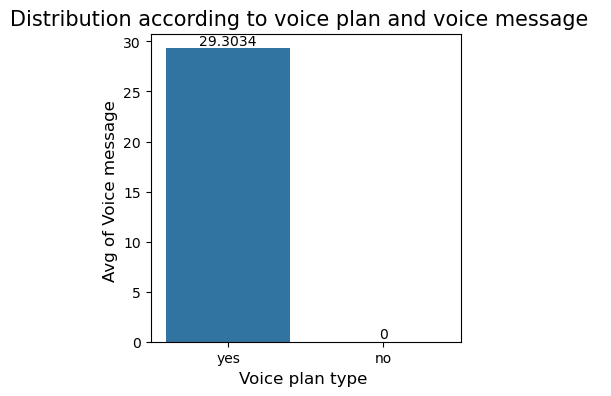

In [33]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'voice.plan',y='voice.messages',data = df1,ax=ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Voice plan type ', fontsize= 12)
plt.ylabel('Avg of Voice message ', fontsize= 12)
plt.title("Distribution according to voice plan and voice message  ",fontsize= 15)
plt.show()

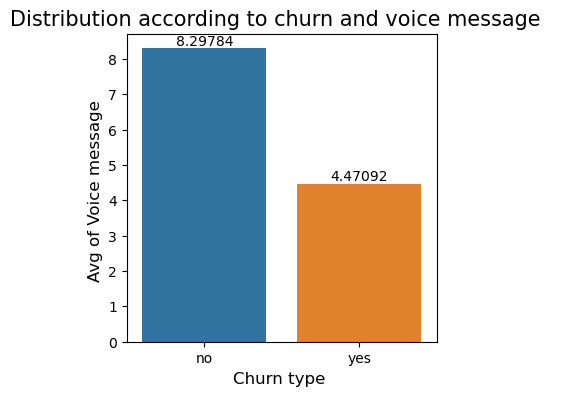

In [34]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'churn',y='voice.messages',data = df1,ax=ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Churn type ', fontsize= 12)
plt.ylabel('Avg of Voice message ', fontsize= 12)
plt.title("Distribution according to churn and voice message  ",fontsize= 15)
plt.show()

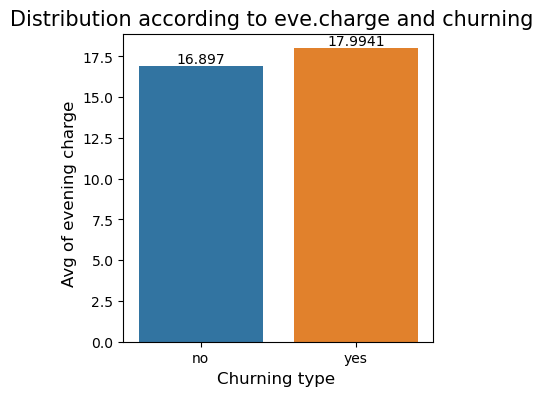

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'churn',y='eve.charge',data = df1,ax=ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Churning type ', fontsize= 12)
plt.ylabel('Avg of evening charge  ', fontsize= 12)
plt.title("Distribution according to eve.charge and churning  ",fontsize= 15)
plt.show()


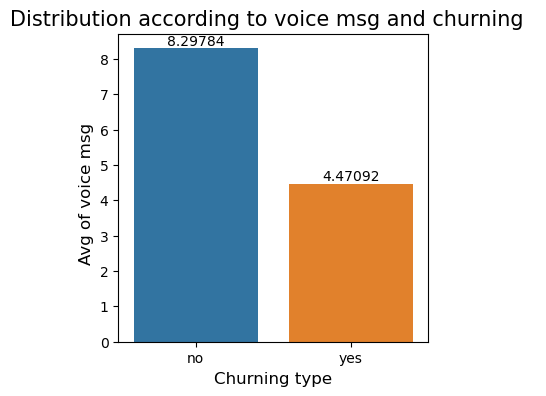

In [36]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'churn',y='voice.messages',data = df1,ax=ax,ci=None)

ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Churning type', fontsize= 12)
plt.ylabel('Avg of voice msg  ', fontsize= 12)
plt.title("Distribution according to voice msg and churning  ",fontsize= 15)
plt.show()

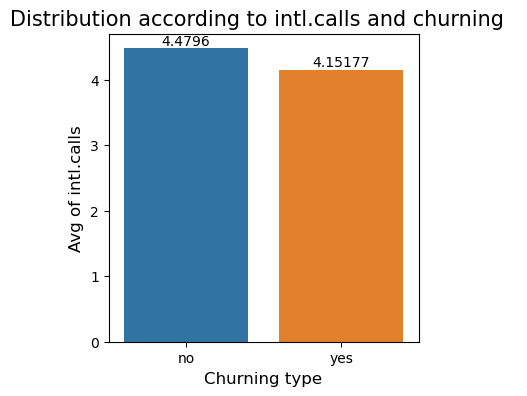

In [37]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'churn',y='intl.calls',data = df1, ax = ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Churning type', fontsize= 12)
plt.ylabel('Avg of intl.calls', fontsize= 12)
plt.title("Distribution according to intl.calls and churning  ",fontsize= 15)
plt.show()

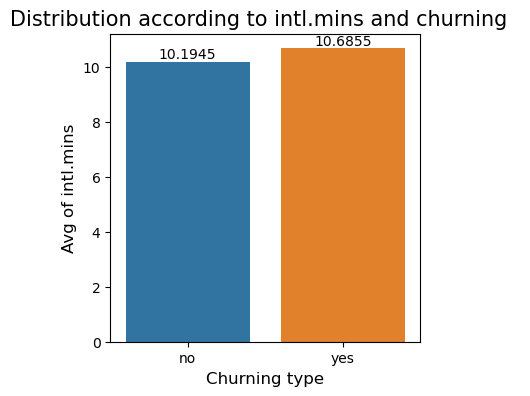

In [38]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'churn',y='intl.mins',data = df1, ax = ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Churning type', fontsize= 12)
plt.ylabel('Avg of intl.mins', fontsize= 12)
plt.title("Distribution according to intl.mins and churning  ",fontsize= 15)
plt.show()

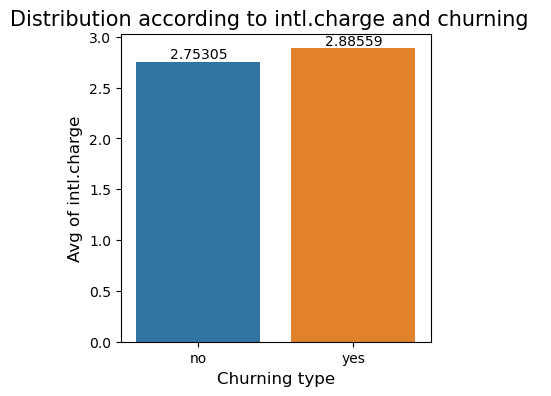

In [39]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'churn',y='intl.charge',data = df1, ax = ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Churning type', fontsize= 12)
plt.ylabel('Avg of intl.charge', fontsize= 12)
plt.title("Distribution according to intl.charge and churning  ",fontsize= 15)
plt.show()

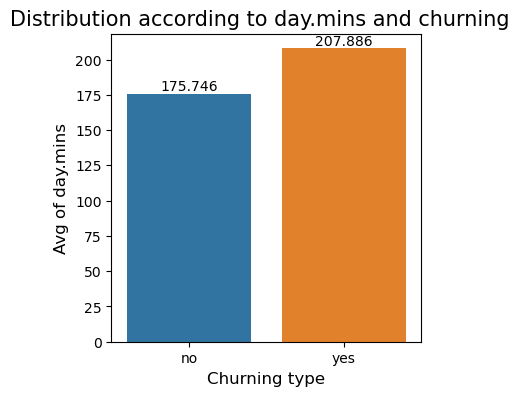

In [40]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'churn',y='day.mins',data = df1, ax = ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Churning type', fontsize= 12)
plt.ylabel('Avg of day.mins', fontsize= 12)
plt.title("Distribution according to day.mins and churning  ",fontsize= 15)
plt.show()

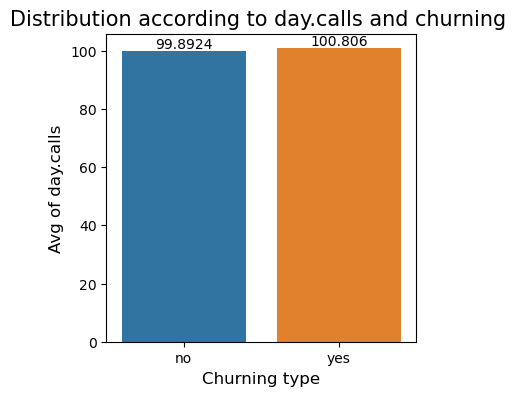

In [41]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'churn',y='day.calls',data = df1, ax = ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Churning type', fontsize= 12)
plt.ylabel('Avg of day.calls', fontsize= 12)
plt.title("Distribution according to day.calls and churning ",fontsize= 15)
plt.show()

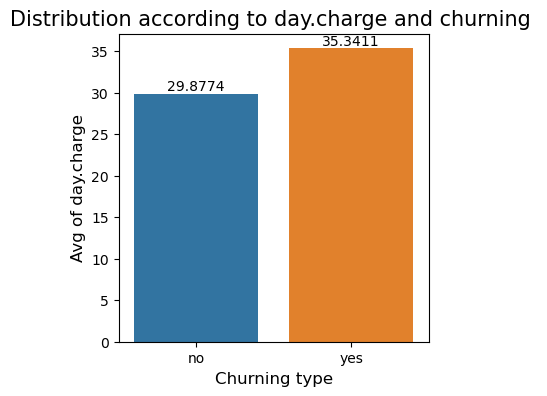

In [42]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'churn',y='day.charge',data = df1, ax = ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Churning type', fontsize= 12)
plt.ylabel('Avg of day.charge', fontsize= 12)
plt.title("Distribution according to day.charge and churning ",fontsize= 15)
plt.show()

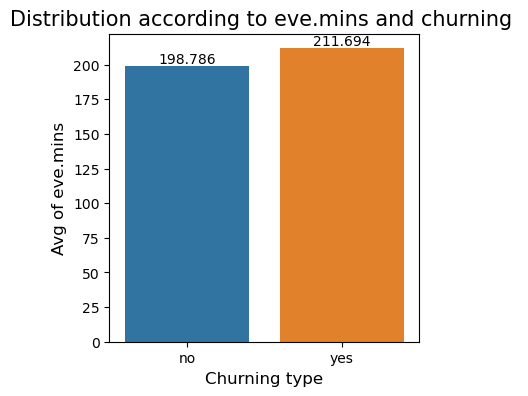

In [43]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'churn',y='eve.mins',data = df1, ax = ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Churning type', fontsize= 12)
plt.ylabel('Avg of eve.mins', fontsize= 12)
plt.title("Distribution according to eve.mins and churning ",fontsize= 15)
plt.show()

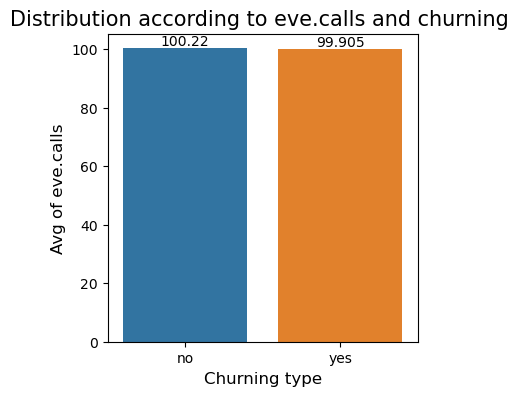

In [44]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'churn',y='eve.calls',data = df1, ax = ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Churning type', fontsize= 12)
plt.ylabel('Avg of eve.calls', fontsize= 12)
plt.title("Distribution according to eve.calls and churning ",fontsize= 15)
plt.show()

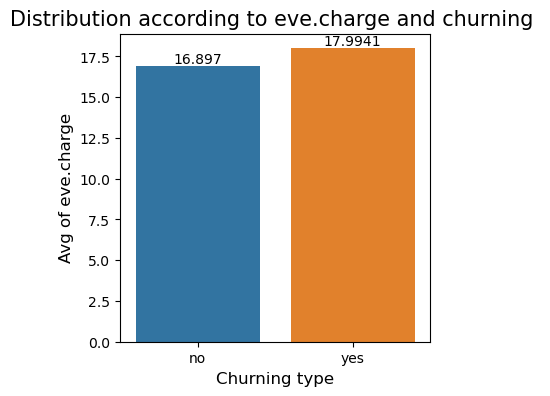

In [45]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'churn',y='eve.charge',data = df1, ax = ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Churning type', fontsize= 12)
plt.ylabel('Avg of eve.charge', fontsize= 12)
plt.title("Distribution according to eve.charge and churning ",fontsize= 15)
plt.show()

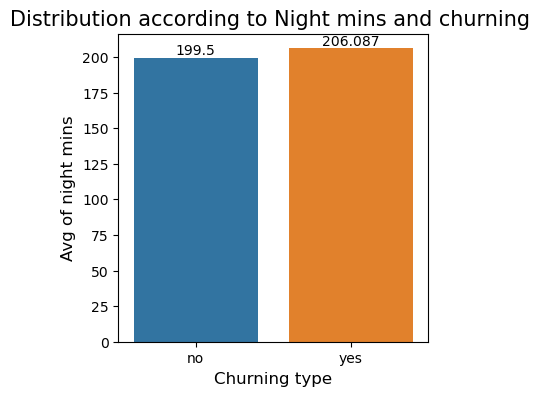

In [46]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'churn',y='night.mins',data = df1, ax = ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Churning type', fontsize= 12)
plt.ylabel('Avg of night mins', fontsize= 12)
plt.title("Distribution according to Night mins and churning ",fontsize= 15)
plt.show()

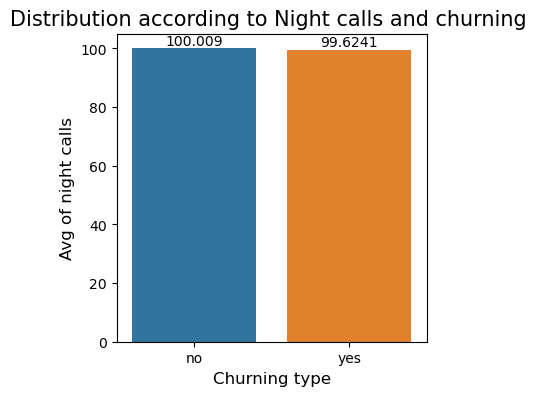

In [47]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'churn',y='night.calls',data = df1, ax = ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Churning type', fontsize= 12)
plt.ylabel('Avg of night calls', fontsize= 12)
plt.title("Distribution according to Night calls and churning ",fontsize= 15)
plt.show()

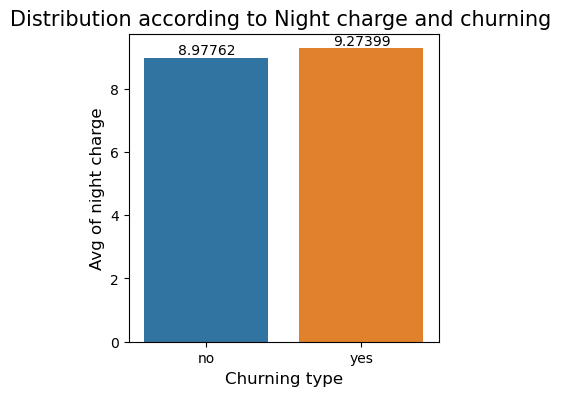

In [48]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'churn',y='night.charge',data = df1, ax = ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Churning type', fontsize= 12)
plt.ylabel('Avg of night charge', fontsize= 12)
plt.title("Distribution according to Night charge and churning ",fontsize= 15)
plt.show()

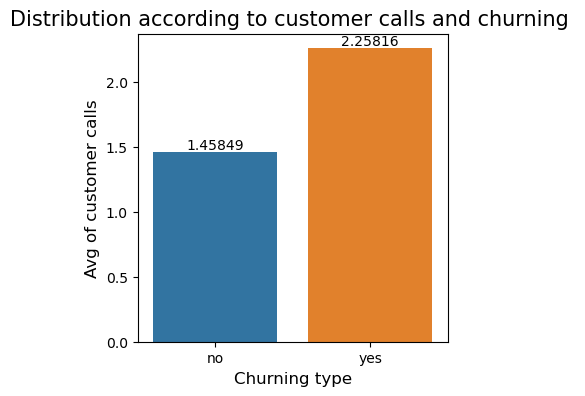

In [49]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'churn',y='customer.calls',data = df1, ax = ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Churning type', fontsize= 12)
plt.ylabel('Avg of customer calls', fontsize= 12)
plt.title("Distribution according to customer calls and churning ",fontsize= 15)
plt.show()

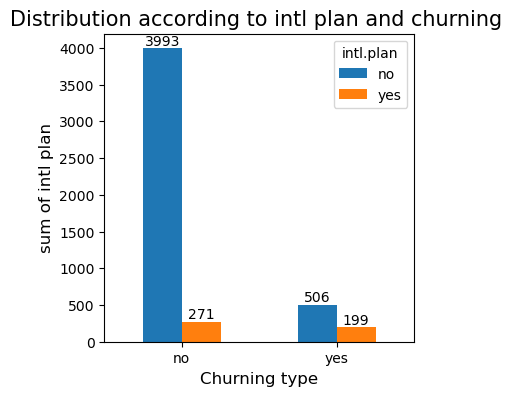

In [50]:
fig, ax = plt.subplots(figsize=(4, 4))
crosstb=pd.crosstab(df1.churn,df1['intl.plan'])
barplot = crosstb.plot.bar(rot = 0,ax=ax)
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.xlabel('Churning type', fontsize= 12)
plt.ylabel('sum of intl plan', fontsize= 12)
plt.title("Distribution according to intl plan and churning ",fontsize= 15)
plt.show()

In [51]:
intl_churned = df.groupby(['intl.plan', 'churn']).size()
intl_churned

intl.plan  churn
no         no       4019
           yes       508
yes        no        274
           yes       199
dtype: int64

In [52]:
p_intlChurned=intl_churned *100 / len(df)
p_intlChurned

intl.plan  churn
no         no       80.38
           yes      10.16
yes        no        5.48
           yes       3.98
dtype: float64

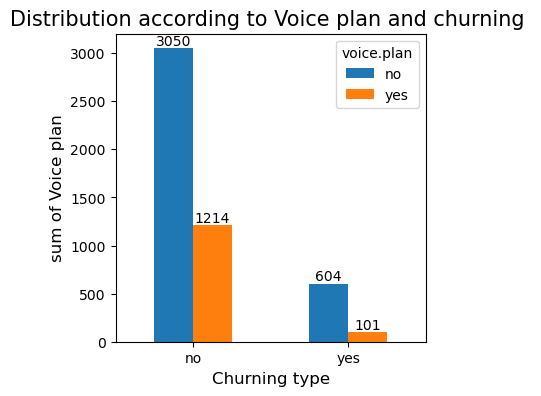

In [53]:
fig, ax = plt.subplots(figsize=(4, 4))
crosstb=pd.crosstab(df1.churn,df1['voice.plan'])
barplot = crosstb.plot.bar(rot=0, ax=ax)
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.xlabel('Churning type', fontsize= 12)
plt.ylabel('sum of Voice plan', fontsize= 12)
plt.title("Distribution according to Voice plan and churning ",fontsize= 15)
plt.show()

In [54]:
p_voice=df1['voice.plan'].value_counts()* 100/len(df)
p_voice

no     73.08
yes    26.30
Name: voice.plan, dtype: float64

In [55]:
voice_churned = df.groupby(['voice.plan', 'churn']).size()
voice_churned

voice.plan  churn
no          no       3072
            yes       605
yes         no       1221
            yes       102
dtype: int64

In [56]:
p_voiceChurned=voice_churned *100 / len(df)
p_voiceChurned

voice.plan  churn
no          no       61.44
            yes      12.10
yes         no       24.42
            yes       2.04
dtype: float64

In [57]:
Statevoice_churned = df.groupby(['voice.plan', 'state']).size()

In [58]:
pd.set_option('display.max_rows', None)
Statevoice_churned.sort_values(ascending = False)

voice.plan  state
no          WV       119
            AL        94
            MN        94
            TX        93
            VA        90
            NY        89
            OR        88
            NJ        85
            WA        83
            ID        83
            WY        83
            MD        82
            UT        81
            OH        76
            MA        76
            VT        76
            WI        76
            ME        75
            KY        75
            MI        73
            KS        73
            RI        73
            NM        72
            MO        72
            IN        72
            OK        70
            CT        70
            CO        69
            NE        69
            NV        69
            MS        69
            DE        69
            MT        68
            NH        67
            SC        66
            IL        66
            HI        66
            TN        66
            NC        64
       

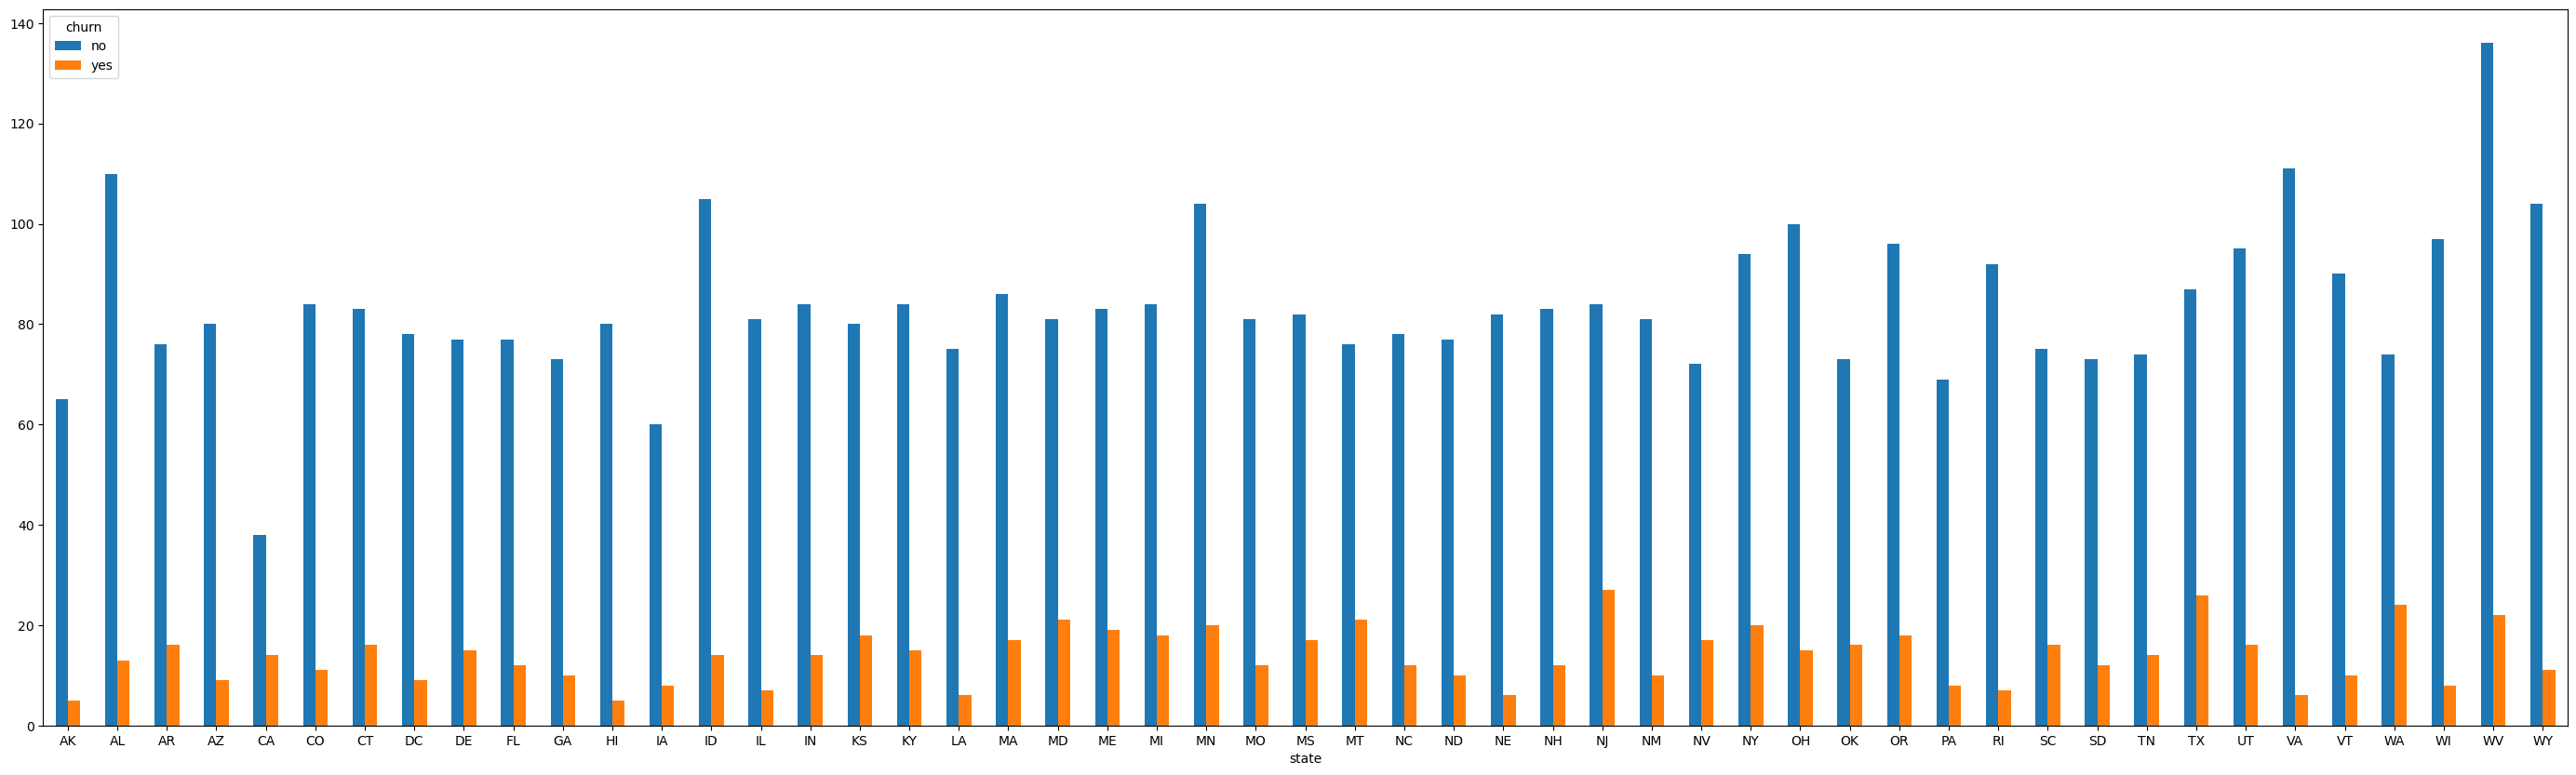

In [59]:
crosstb=pd.crosstab(df1['state'],df1.churn)
barplot = crosstb.plot.bar(rot=0,figsize=(35,10))

plt.show()

In [60]:
churn_count = df1.groupby(['state', 'churn']).count()
churn_count

area.code  account.length  voice.plan  voice.messages  intl.plan  \
state churn                                                                     
AK    no            65              65          65              65         65   
      yes            5               5           5               5          5   
AL    no           110             110         110             110        110   
      yes           13              13          13              13         13   
AR    no            76              76          76              76         76   
      yes           16              16          16              16         16   
AZ    no            80              80          80              80         80   
      yes            9               9           9               9          9   
CA    no            38              38          38              38         38   
      yes           14              14          14              14         14   
CO    no            84              84          84              84         84   
      yes           11              11          11              11         11   
CT    no            83              83          83              83         83   
      yes           16              16          16              16         16   
DC    no            78              78          78              78         78   
      yes            9               9           9               9          9   
DE    no            77              77          77              77         77   
      yes           15              15          15              15         15   
FL    no            77              77          77              77         77   
      yes           12              12          12              12         12   
GA    no            73              73          73              73         73   
      yes           10              10          10              10         10   
HI    no            80              80          80              80         80   
      yes            5               5           5               5          5   
IA    no            60              60          60              60         60   
      yes            8               8           8               8          8   
ID    no           105             105         105             105        105   
      yes           14              14          14              14         14   
IL    no            81              81          81              81         81   
      yes            7               7           7               7          7   
IN    no            84              84          84              84         84   
      yes           14              14          14              14         14   
KS    no            80              80          80              80         80   
      yes           18              18          18              18         18   
KY    no            84              84          84              84         84   
      yes           15              15          15              15         15   
LA    no            75              75          75              75         75   
      yes            6               6           6               6          6   
MA    no            86              86          86              86         86   
      yes           17              17          17              17         17   
MD    no            81              81          81              81         81   
      yes           21              21          21              21         21   
ME    no            83              83          83              83         83   
      yes           19              19          19              19         19   
MI    no            84              84          84              84         84   
      yes           18              18          18              18         18   
MN    no           104             104         104             104        104   
      yes           20              20      

In [61]:
churncount = churn_count.iloc[:,0:1]
churncount

area.code
state churn           
AK    no            65
      yes            5
AL    no           110
      yes           13
AR    no            76
      yes           16
AZ    no            80
      yes            9
CA    no            38
      yes           14
CO    no            84
      yes           11
CT    no            83
      yes           16
DC    no            78
      yes            9
DE    no            77
      yes           15
FL    no            77
      yes           12
GA    no            73
      yes           10
HI    no            80
      yes            5
IA    no            60
      yes            8
ID    no           105
      yes           14
IL    no            81
      yes            7
IN    no            84
      yes           14
KS    no            80
      yes           18
KY    no            84
      yes           15
LA    no            75
      yes            6
MA    no            86
      yes           17
MD    no            81
      yes           21
ME    no            83
      yes           19
MI    no            84
      yes           18
MN    no           104
      yes           20
MO    no            81
      yes           12
MS    no            82
      yes           17
MT    no            76
      yes           21
NC    no            78
      yes           12
ND    no            77
      yes           10
NE    no            82
      yes            6
NH    no            83
      yes           12
NJ    no            84
      yes           27
NM    no            81
      yes           10
NV    no            72
      yes           17
NY    no            94
      yes           20
OH    no           100
      yes           15
OK    no            73
      yes           16
OR    no            96
      yes           18
PA    no            69
      yes            8
RI    no            92
      yes            7
SC    no            75
      yes           16
SD    no            73
      yes           12
TN    no            74
      yes           14
TX    no            87
      yes           26
UT    no            95
      yes           16
VA    no           111
      yes            6
VT    no            90
      yes           10
WA    no            74
      yes           24
WI    no            97
      yes            8
WV    no           136
      yes           22
WY    no           104
      yes           11

In [62]:
pd.set_option('display.max_rows',None)
churncount.rename(columns = {'area.code':'Customers'})
churncount.head(102)

area.code
state churn           
AK    no            65
      yes            5
AL    no           110
      yes           13
AR    no            76
      yes           16
AZ    no            80
      yes            9
CA    no            38
      yes           14
CO    no            84
      yes           11
CT    no            83
      yes           16
DC    no            78
      yes            9
DE    no            77
      yes           15
FL    no            77
      yes           12
GA    no            73
      yes           10
HI    no            80
      yes            5
IA    no            60
      yes            8
ID    no           105
      yes           14
IL    no            81
      yes            7
IN    no            84
      yes           14
KS    no            80
      yes           18
KY    no            84
      yes           15
LA    no            75
      yes            6
MA    no            86
      yes           17
MD    no            81
      yes           21
ME    no            83
      yes           19
MI    no            84
      yes           18
MN    no           104
      yes           20
MO    no            81
      yes           12
MS    no            82
      yes           17
MT    no            76
      yes           21
NC    no            78
      yes           12
ND    no            77
      yes           10
NE    no            82
      yes            6
NH    no            83
      yes           12
NJ    no            84
      yes           27
NM    no            81
      yes           10
NV    no            72
      yes           17
NY    no            94
      yes           20
OH    no           100
      yes           15
OK    no            73
      yes           16
OR    no            96
      yes           18
PA    no            69
      yes            8
RI    no            92
      yes            7
SC    no            75
      yes           16
SD    no            73
      yes           12
TN    no            74
      yes           14
TX    no            87
      yes           26
UT    no            95
      yes           16
VA    no           111
      yes            6
VT    no            90
      yes           10
WA    no            74
      yes           24
WI    no            97
      yes            8
WV    no           136
      yes           22
WY    no           104
      yes           11

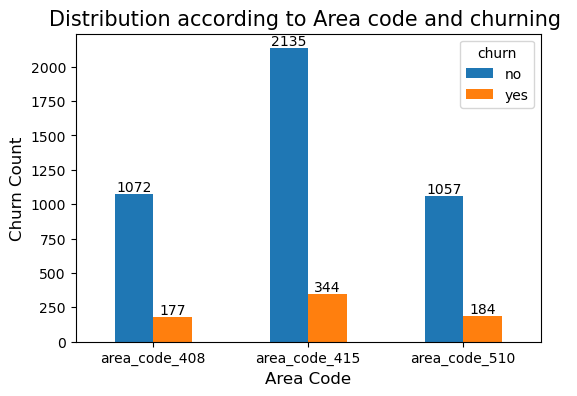

In [63]:
fig, ax = plt.subplots(figsize=(6, 4))
crosstb=pd.crosstab(df1['area.code'],df1.churn)
barplot = crosstb.plot.bar(rot=0, ax=ax)
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.xlabel('Area Code', fontsize= 12)
plt.ylabel('Churn Count', fontsize= 12)
plt.title("Distribution according to Area code and churning ",fontsize= 15)
plt.show()

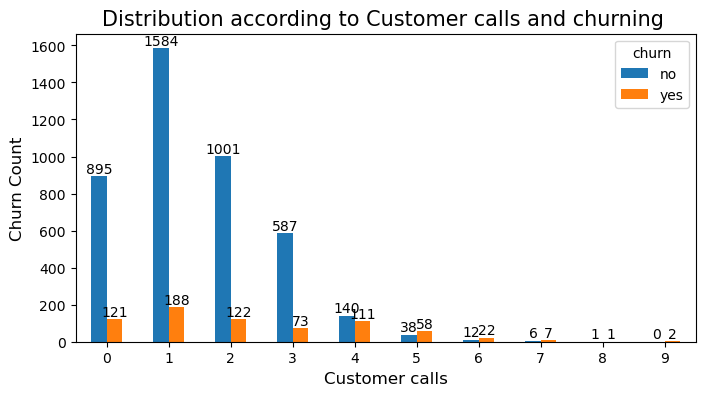

In [64]:
fig, ax = plt.subplots(figsize=(8, 4))
crosstb=pd.crosstab(df1['customer.calls'],df1.churn)
barplot = crosstb.plot.bar(rot=0, ax=ax)
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.xlabel('Customer calls', fontsize= 12)
plt.ylabel('Churn Count', fontsize= 12)
plt.title("Distribution according to Customer calls and churning ",fontsize= 15)
plt.show()

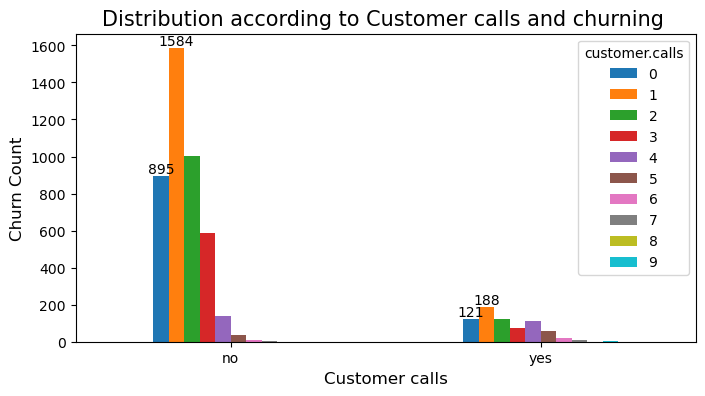

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))
crosstb=pd.crosstab(df1.churn,df1['customer.calls'])
barplot = crosstb.plot.bar(rot=0, ax=ax)
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.xlabel('Customer calls', fontsize= 12)
plt.ylabel('Churn Count', fontsize= 12)
plt.title("Distribution according to Customer calls and churning ",fontsize= 15)
plt.show()

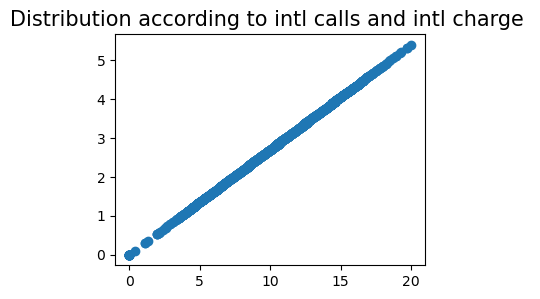

In [28]:
fig, ax = plt.subplots(figsize=(4, 3))
plt.scatter( df1['intl.mins'], df1['intl.charge'])
plt.title("Distribution according to intl calls and intl charge ",fontsize= 15)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
plt.title("Distribution according to day calls and day charge ",fontsize= 15)
plt.scatter( df1['day.mins'], df1['day.charge'])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
plt.title("Distribution according to eve calls and eve charge ",fontsize= 15)
plt.scatter( df1['eve.mins'], df1['eve.charge'])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
plt.title("Distribution according to night calls and night charge ",fontsize= 15)
plt.scatter( df1['night.mins'], df1['night.charge'])
plt.show()

In [29]:
abc = ['account.length','voice.messages','intl.mins','intl.calls','intl.charge','day.mins','day.calls','day.charge','eve.mins','eve.calls','eve.charge','night.mins','night.calls','night.charge','customer.calls']
abc

['account.length',
 'voice.messages',
 'intl.mins',
 'intl.calls',
 'intl.charge',
 'day.mins',
 'day.calls',
 'day.charge',
 'eve.mins',
 'eve.calls',
 'eve.charge',
 'night.mins',
 'night.calls',
 'night.charge',
 'customer.calls']

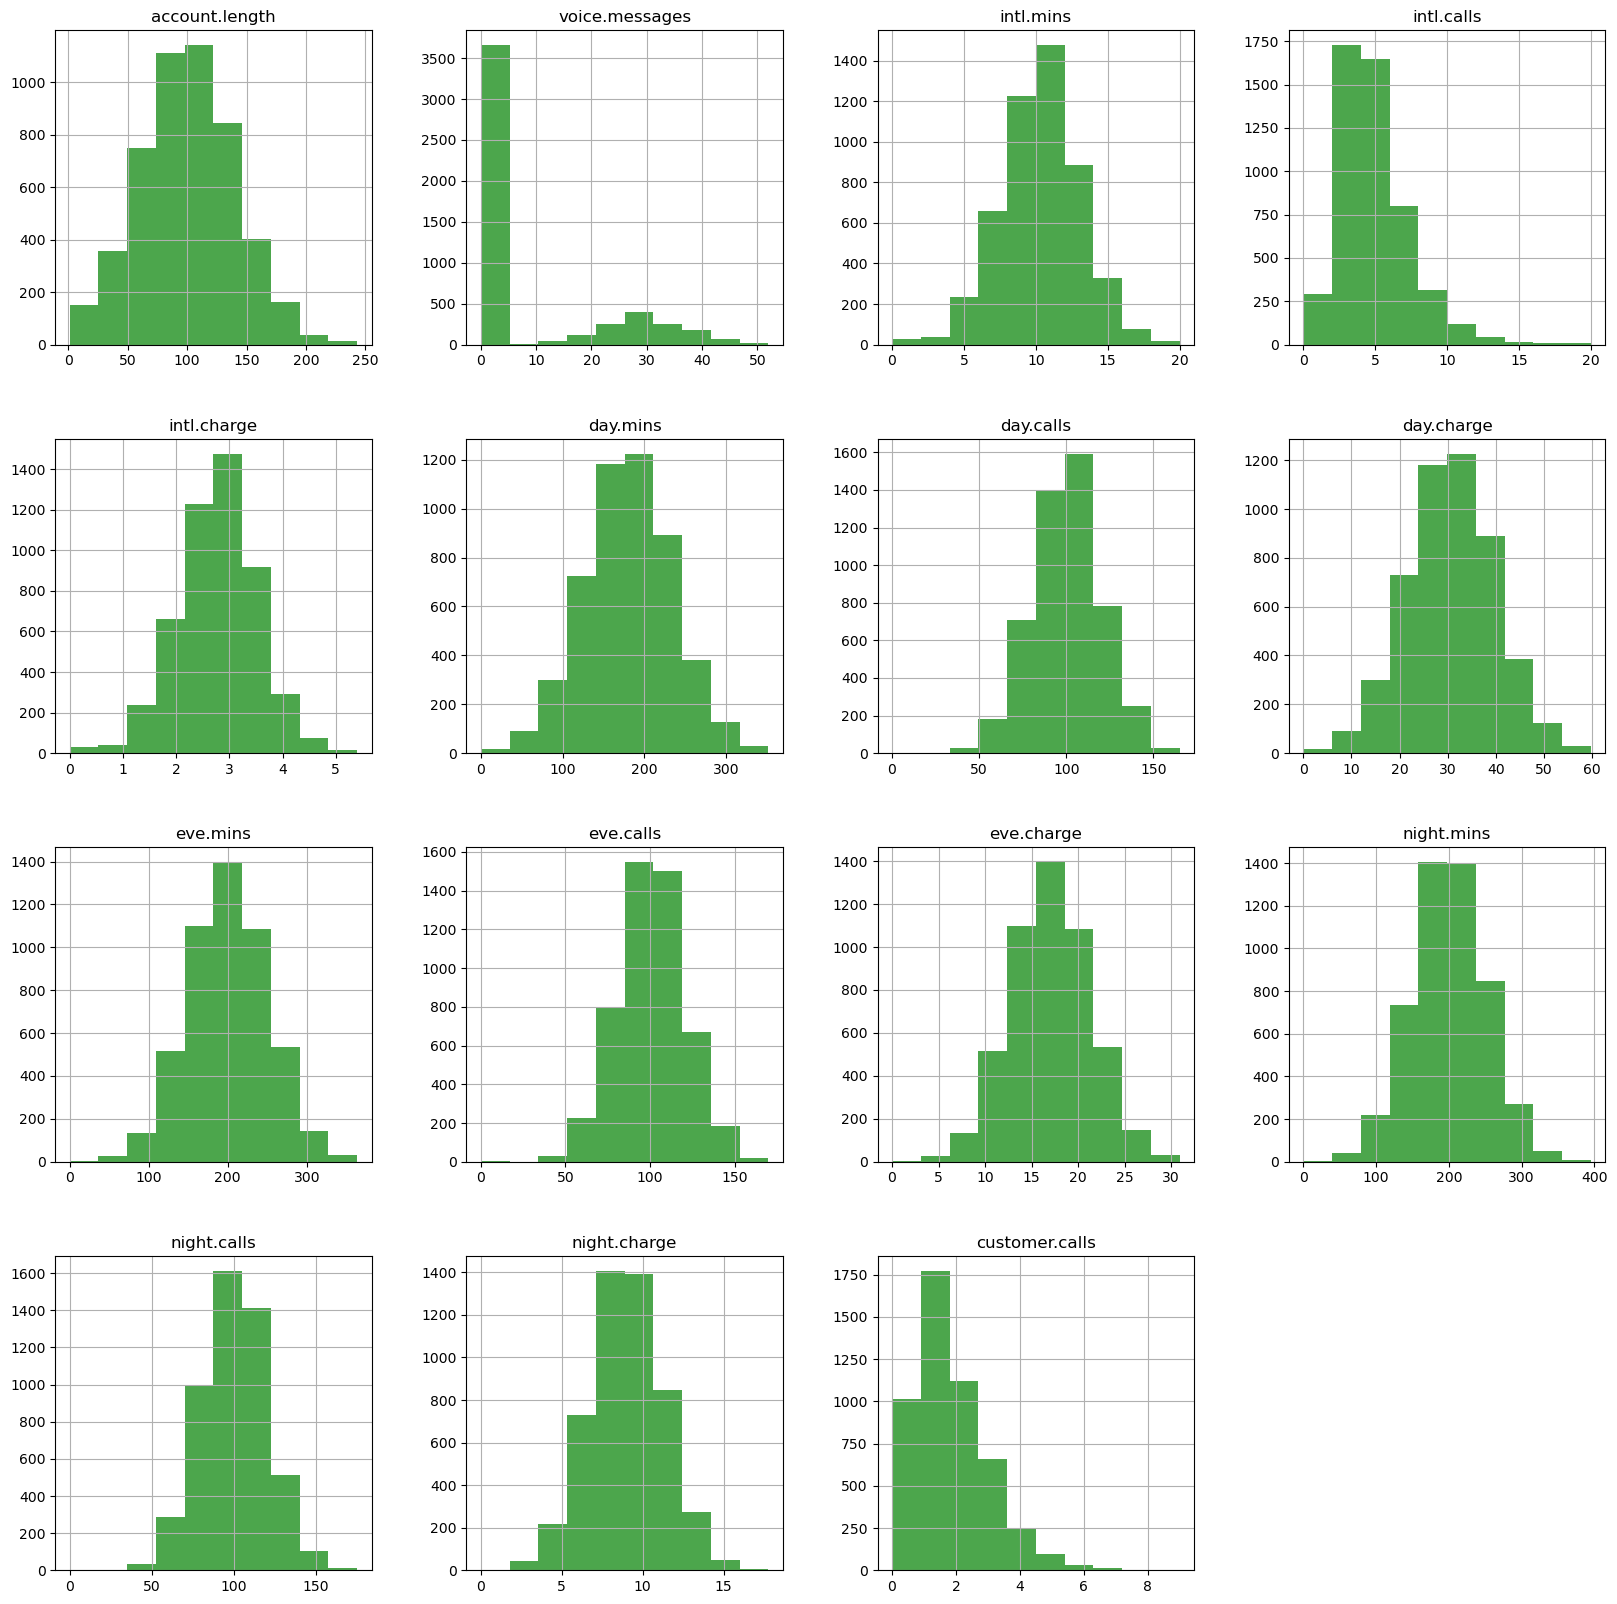

In [30]:
df1[abc].hist(figsize=(20,20),color='g',alpha = 0.7)

plt.show()

In [31]:
corr = df1.corr()

corr


,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
account.length,1.000000,-0.013682,0.004165,0.014686,0.004173,-0.000715,0.027558,-0.000717,-0.007600,0.008187,-0.007597,0.001229,-0.008077,0.001218,-0.002457,0.021307
voice.messages,-0.013682,1.000000,0.001497,-0.000970,0.001539,0.005641,0.001008,0.005636,0.018517,-0.003682,0.018523,0.004094,0.001903,0.004086,-0.006676,-0.098588
intl.mins,0.004165,0.001497,1.000000,0.016604,0.999993,-0.018335,0.014284,-0.018339,-0.000533,-0.006097,-0.000539,-0.006178,0.000429,-0.006174,-0.010839,0.062034
intl.calls,0.014686,-0.000970,0.016604,1.000000,0.016714,-0.000541,0.011457,-0.000544,0.007402,0.006675,0.007407,-0.017202,0.000008,-0.017172,-0.019519,-0.046513
intl.charge,0.004173,0.001539,0.999993,0.016714,1.000000,-0.018261,0.014348,-0.018265,-0.000512,-0.006151,-0.000518,-0.006119,0.000411,-0.006114,-0.010893,0.062028
day.mins,-0.000715,0.005641,-0.018335,-0.000541,-0.018261,1.000000,-0.000342,1.000000,-0.011572,0.006587,-0.011581,0.011755,0.004091,0.011738,0.002573,0.207961
day.calls,0.027558,0.001008,0.014284,0.011457,0.014348,-0.000342,1.000000,-0.000342,-0.001526,0.001984,-0.001522,0.002023,-0.008645,0.002019,-0.010938,0.016067
day.charge,-0.000717,0.005636,-0.018339,-0.000544,-0.018265,1.000000,-0.000342,1.000000,-0.011568,0.006588,-0.011578,0.011757,0.004090,0.011740,0.002567,0.207956
eve.mins,-0.007600,0.018517,-0.000533,0.007402,-0.000512,-0.011572,-0.001526,-0.011568,1.000000,0.002429,1.000000,-0.017189,0.016336,-0.017191,-0.011936,0.089104
eve.calls,0.008187,-0.003682,-0.006097,0.006675,-0.006151,0.006587,0.001984,0.006588,0.002429,1.000000,0.002444,0.002049,-0.012014,0.002068,0.005985,-0.005534


In [ ]:
f, ax = plt.subplots(figsize=(18,12))
sns.heatmap(corr, annot = True,linewidths=0.30,ax=ax)
plt.title('Heat Map')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [36]:
data1 = df1.state.value_counts()
data1

WV    158
MN    124
AL    123
ID    119
VA    117
OH    115
WY    115
OR    114
NY    114
TX    113
UT    111
NJ    111
WI    105
MA    103
MI    102
ME    102
MD    102
VT    100
KY     99
MS     99
CT     99
RI     99
IN     98
WA     98
KS     98
MT     97
CO     95
NH     95
MO     93
DE     92
AR     92
SC     91
NM     91
NC     90
AZ     89
FL     89
NV     89
OK     89
TN     88
IL     88
NE     88
DC     87
ND     87
SD     85
HI     85
GA     83
LA     81
PA     77
AK     70
IA     68
CA     52
Name: state, dtype: int64

In [37]:
state_count= data1.index
state_count

Index(['WV', 'MN', 'AL', 'ID', 'VA', 'OH', 'WY', 'OR', 'NY', 'TX', 'UT', 'NJ',
       'WI', 'MA', 'MI', 'ME', 'MD', 'VT', 'KY', 'MS', 'CT', 'RI', 'IN', 'WA',
       'KS', 'MT', 'CO', 'NH', 'MO', 'DE', 'AR', 'SC', 'NM', 'NC', 'AZ', 'FL',
       'NV', 'OK', 'TN', 'IL', 'NE', 'DC', 'ND', 'SD', 'HI', 'GA', 'LA', 'PA',
       'AK', 'IA', 'CA'],
      dtype='object')

In [38]:
state_value= data1.values
state_value

array([158, 124, 123, 119, 117, 115, 115, 114, 114, 113, 111, 111, 105,
       103, 102, 102, 102, 100,  99,  99,  99,  99,  98,  98,  98,  97,
        95,  95,  93,  92,  92,  91,  91,  90,  89,  89,  89,  89,  88,
        88,  88,  87,  87,  85,  85,  83,  81,  77,  70,  68,  52],
      dtype=int64)

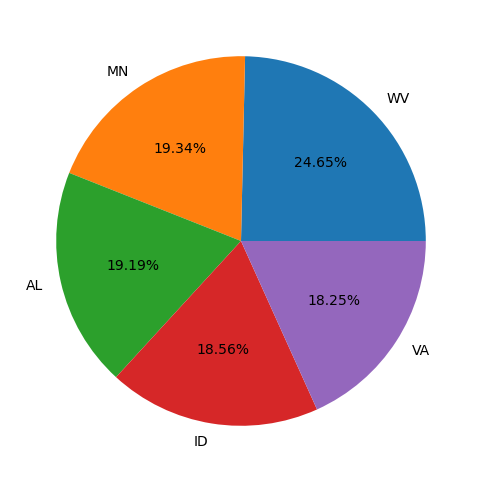

In [39]:
#Top 5 States

plt.pie(state_value[:5],labels =state_count[:5],autopct= '%1.2f%%')

plt.show()

In [40]:
data2 = df1.state.value_counts().sort_values()
data2

CA     52
IA     68
AK     70
PA     77
LA     81
GA     83
HI     85
SD     85
ND     87
DC     87
NE     88
IL     88
TN     88
AZ     89
NV     89
FL     89
OK     89
NC     90
NM     91
SC     91
AR     92
DE     92
MO     93
CO     95
NH     95
MT     97
WA     98
IN     98
KS     98
RI     99
CT     99
MS     99
KY     99
VT    100
MD    102
ME    102
MI    102
MA    103
WI    105
NJ    111
UT    111
TX    113
NY    114
OR    114
WY    115
OH    115
VA    117
ID    119
AL    123
MN    124
WV    158
Name: state, dtype: int64

In [41]:
state_count1 = data2.index
state_count1

Index(['CA', 'IA', 'AK', 'PA', 'LA', 'GA', 'HI', 'SD', 'ND', 'DC', 'NE', 'IL',
       'TN', 'AZ', 'NV', 'FL', 'OK', 'NC', 'NM', 'SC', 'AR', 'DE', 'MO', 'CO',
       'NH', 'MT', 'WA', 'IN', 'KS', 'RI', 'CT', 'MS', 'KY', 'VT', 'MD', 'ME',
       'MI', 'MA', 'WI', 'NJ', 'UT', 'TX', 'NY', 'OR', 'WY', 'OH', 'VA', 'ID',
       'AL', 'MN', 'WV'],
      dtype='object')

In [42]:
state_value1 = data2.values
state_value1

array([ 52,  68,  70,  77,  81,  83,  85,  85,  87,  87,  88,  88,  88,
        89,  89,  89,  89,  90,  91,  91,  92,  92,  93,  95,  95,  97,
        98,  98,  98,  99,  99,  99,  99, 100, 102, 102, 102, 103, 105,
       111, 111, 113, 114, 114, 115, 115, 117, 119, 123, 124, 158],
      dtype=int64)

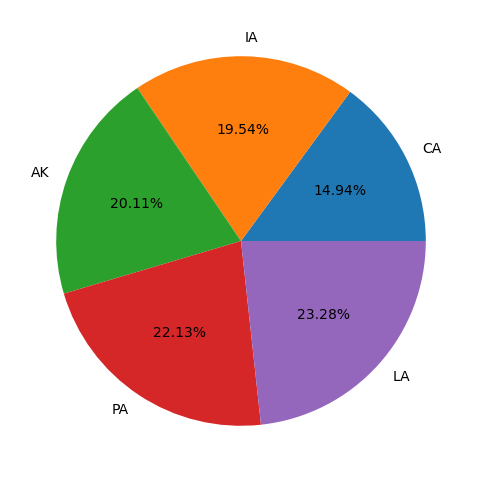

In [43]:
#top 5 states with less customers 
plt.pie(state_value1[:5],labels =state_count1[:5], autopct= '%1.2f%%')
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df1['churn']=LE.fit_transform(df1['churn'])

In [20]:
df1

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0


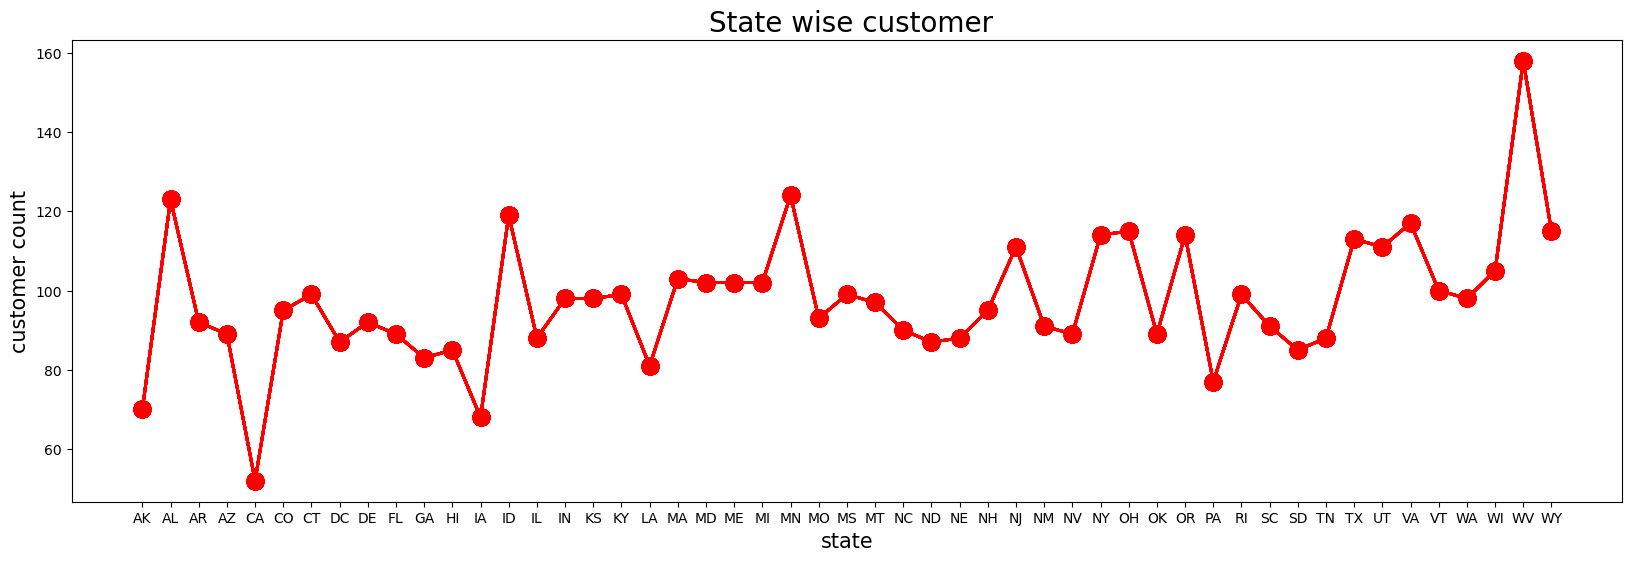

In [32]:

s2=df1.groupby(['state']).count()

plt.rcParams['figure.figsize'] = (20, 6)

plt.plot(s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" State wise customer", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('customer count', fontsize = 15)
plt.show()

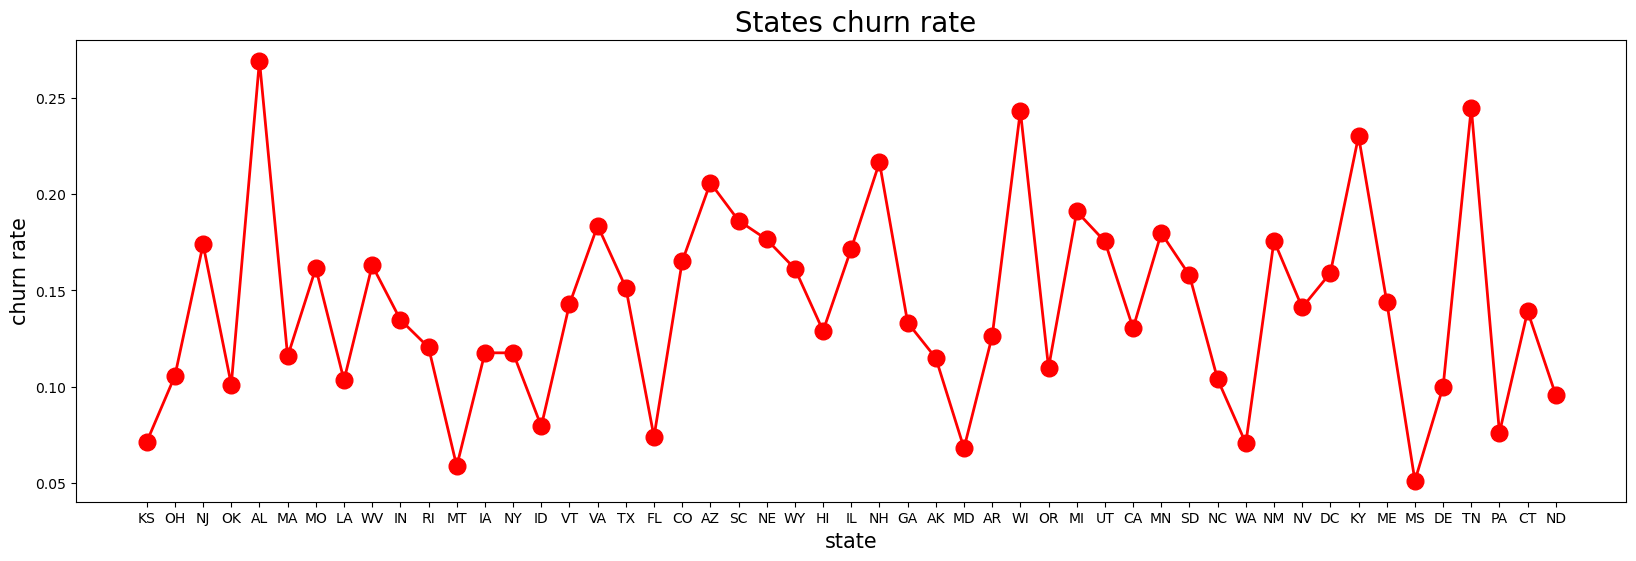

In [33]:
s1=df1['state'].unique()
s2=df1.groupby(['state'])['churn'].mean()
plt.rcParams['figure.figsize'] = (20, 6)

plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" States churn rate", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('churn rate', fontsize = 15)
plt.show()

In [21]:
data_churn = df1.loc[df1['churn']==1]

In [22]:
data_churn

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
10,IN,area_code_415,65,no,0,no,12.7,6,3.43,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,4,1
15,NY,area_code_415,161,no,0,no,5.4,9,1.46,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,4,1
21,CO,area_code_408,77,no,0,no,5.7,6,1.54,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5,1
33,AZ,area_code_408,12,no,0,no,11.8,3,3.19,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,1,1
41,MD,area_code_408,135,yes,41,yes,14.6,15,3.94,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,NM,area_code_408,137,no,0,yes,10.6,2,2.86,312.4,110,53.11,231.1,73,19.64,120.1,78,5.40,1,1
4980,WA,area_code_408,73,no,0,no,12.3,2,3.32,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,3,1
4990,ND,area_code_510,140,no,0,no,7.5,6,2.03,244.7,115,41.60,258.6,101,21.98,231.3,112,10.41,1,1
4991,AZ,area_code_510,97,no,0,no,8.8,5,2.38,252.6,89,42.94,340.3,91,28.93,256.5,67,11.54,1,1


In [23]:
data_notchurn = df1.loc[df1['churn']==0]

In [24]:
data_notchurn

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,NC,area_code_408,75,no,0,no,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,0
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0


In [ ]:
sns.distplot(data_churn["account.length"],label='Churned')
plt.title('Distribution of Account Length')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(4,4))
donut= (data_churn['day.charge'].sum(),data_churn['eve.charge'].sum(),data_churn['night.charge'].sum(), data_churn['intl.charge'].sum()) 
plt.pie(donut , explode=None,autopct='%1.1f%%',shadow=True,radius=1.3)
circle= plt.Circle( (0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
  
# Adding Title of chart
plt.title('Charges paid by churned people')
  
# Add Legends
labels = ['Day charge', 'Eve charge', 'night charge', 'intl charge']
  
plt.legend(labels, loc="center")
  
# Displaying Chart
plt.show()

In [ ]:
plt.figure(figsize=(4,4))
donut= (df1['day.charge'].sum(),df1['eve.charge'].sum(),df1['night.charge'].sum(), df1['intl.charge'].sum()) 
plt.pie(donut , explode=None,autopct='%1.1f%%',shadow=True,radius=1.3)
circle= plt.Circle( (0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
  
# Adding Title of chart
plt.title('Charges paid by total customer')
  
# Add Legends
labels = ['Day charge', 'Eve charge', 'night charge', 'intl charge']
  
plt.legend(labels, loc="center")
  
# Displaying Chart
plt.show()

In [ ]:
plt.figure(figsize=(4,4))
donut= (data_churn['day.mins'].sum(),data_churn['eve.mins'].sum(),data_churn['night.mins'].sum(), data_churn['intl.mins'].sum()) 
plt.pie(donut , explode=None,autopct='%1.1f%%',shadow=True,radius=1.3)
circle= plt.Circle( (0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
  
# Adding Title of chart
plt.title('Total mins used by churned people')
  
# Add Legends
labels = ['Day Mins', 'Eve mins', 'night mins', 'intl mins']
  
plt.legend(labels, loc="center")
  
# Displaying Chart
plt.show()

In [ ]:
plt.figure(figsize=(4,4))
donut= (df1['day.mins'].sum(),df1['eve.mins'].sum(),df1['night.mins'].sum(), df1['intl.mins'].sum()) 
plt.pie(donut , explode=None,autopct='%1.1f%%',shadow=True,radius=1.3)
circle= plt.Circle( (0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
  
# Adding Title of chart
plt.title('Charges paid by total customer')
  
# Add Legends
labels = ['Day mins', 'Eve mins', 'night mins', 'intl mins']
  
plt.legend(labels, loc="center")
  
# Displaying Chart
plt.show()

In [ ]:
plt.figure(figsize=(4,4))
donut= (data_notchurn['day.mins'].sum(),data_notchurn['eve.mins'].sum(),data_notchurn['night.mins'].sum(), data_notchurn['intl.mins'].sum()) 
plt.pie(donut , explode=None,autopct='%1.1f%%',shadow=True,radius=1.3)
circle= plt.Circle( (0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
  
# Adding Title of chart
plt.title('Total mins used by not churned people')
  
# Add Legends
labels = ['Day Mins', 'Eve mins', 'night mins', 'intl mins']
  
plt.legend(labels, loc="center")
  
# Displaying Chart
plt.show()

In [ ]:
## customer calls

In [25]:
custcall_churn = data_churn.loc[data_churn ['customer.calls']>3]
custcall_churn

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
10,IN,area_code_415,65,no,0,no,12.7,6,3.43,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,4,1
15,NY,area_code_415,161,no,0,no,5.4,9,1.46,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,4,1
21,CO,area_code_408,77,no,0,no,5.7,6,1.54,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5,1
48,ID,area_code_415,119,no,0,no,8.8,3,2.38,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,5,1
54,WY,area_code_415,87,no,0,no,9.7,3,2.62,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,CT,area_code_510,25,no,0,no,13.6,3,3.67,144.1,111,24.50,224.8,89,19.11,132.9,110,5.98,4,1
4898,ND,area_code_408,152,no,0,no,8.2,4,2.21,298.1,113,50.68,228.0,119,19.38,228.1,98,10.26,4,1
4919,NJ,area_code_415,77,no,0,yes,8.5,3,2.30,323.7,106,55.03,139.2,99,11.83,204.4,89,9.20,6,1
4939,MN,area_code_408,30,no,0,no,11.3,7,3.05,112.9,81,19.19,224.8,68,19.11,188.4,122,8.48,4,1


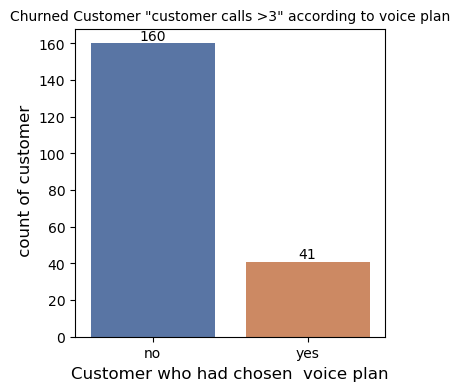

In [26]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(x = custcall_churn['voice.plan'],palette='deep')
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Customer who had chosen  voice plan', fontsize= 12)
plt.ylabel(' count of customer', fontsize= 12)
plt.title('Churned Customer "customer calls >3" according to voice plan',fontsize= 10)
plt.show()

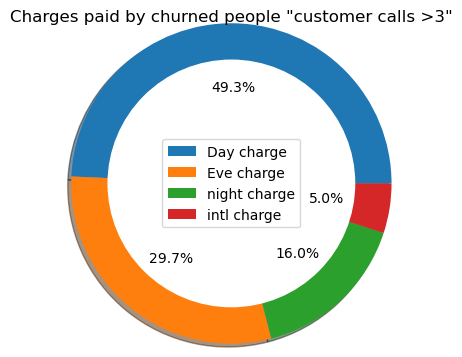

In [27]:
plt.figure(figsize=(4,4))
donut= (custcall_churn['day.charge'].sum(),custcall_churn['eve.charge'].sum(),custcall_churn['night.charge'].sum(), custcall_churn['intl.charge'].sum()) 
plt.pie(donut , explode=None,autopct='%1.1f%%',shadow=True,radius=1.3)
circle= plt.Circle( (0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
  
# Adding Title of chart
plt.title('Charges paid by churned people "customer calls >3"')
  
# Add Legends
labels = ['Day charge', 'Eve charge', 'night charge', 'intl charge']
  
plt.legend(labels, loc="center")
  
# Displaying Chart
plt.show()

In [ ]:
plt.figure(figsize=(4,4))
donut= (custcall_churn['day.mins'].sum(),custcall_churn['eve.mins'].sum(),custcall_churn['night.mins'].sum(), custcall_churn['intl.mins'].sum()) 
plt.pie(donut , explode=None,autopct='%1.1f%%',shadow=True,radius=1.3)
circle= plt.Circle( (0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
  
# Adding Title of chart
plt.title('Mins used by churned people "customer calls >3"')
  
# Add Legends
labels = ['Day mins', 'Eve mins', 'night mins', 'intl mins']
  
plt.legend(labels, loc="center")
  
# Displaying Chart
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(x = custcall_churn['intl.plan'],palette='deep')
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Customer who had chosen  intl plan', fontsize= 12)
plt.ylabel(' count of customer', fontsize= 12)
plt.title('Churned Customer "customer calls >3" according to intl plan' ,fontsize= 10)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(x = data_churn['intl.plan'],palette='deep')
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Customer who had chosen  intl plan', fontsize= 12)
plt.ylabel(' count of customer', fontsize= 12)
plt.title('Churned Customer according to intl plan' ,fontsize= 10)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'intl.plan',y='intl.charge',data = data_churn, ax = ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Intl plan type', fontsize= 12)
plt.ylabel('Avg of intl charge', fontsize= 12)
plt.title('Churned Customer according to intl plan vs intl charge',fontsize= 10)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'intl.plan',y='intl.charge',data = custcall_churn, ax = ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Intl plan type', fontsize= 12)
plt.ylabel('Avg of intl charge', fontsize= 12)
plt.title('Churned Customer "customer calls >3" according to intl plan vs intl charge',fontsize= 10)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = 'intl.plan',y='intl.charge',data = df1, ax = ax, ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Intl plan type', fontsize= 12)
plt.ylabel('Avg of intl charge', fontsize= 12)
plt.title('Customer according to intl plan vs intl charge',fontsize= 10)
plt.show()

Insights:

In this data, churning happens with customer who calls customer calls more than 3 times.
If we check the data of those customers, we can find that most of them are paying more day charge but when comparing with no of mins used by customers, nyt mins is higher.
Also those customers who did not opt for intl plan are paying intl charges

In [44]:
custcall_churned = df1.loc[df1 ['customer.calls']>3]
custcall_churned

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
10,IN,area_code_415,65,no,0,no,12.7,6,3.43,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,4,1
14,IA,area_code_415,62,no,0,no,13.1,6,3.54,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,4,0
15,NY,area_code_415,161,no,0,no,5.4,9,1.46,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,4,1
21,CO,area_code_408,77,no,0,no,5.7,6,1.54,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5,1
48,ID,area_code_415,119,no,0,no,8.8,3,2.38,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,MN,area_code_415,120,no,0,no,8.3,10,2.24,198.0,101,33.66,190.2,74,16.17,241.2,105,10.85,4,0
4939,MN,area_code_408,30,no,0,no,11.3,7,3.05,112.9,81,19.19,224.8,68,19.11,188.4,122,8.48,4,1
4947,OK,area_code_408,50,no,0,no,10.5,5,2.84,198.7,114,33.78,141.5,90,12.03,293.0,79,13.18,4,0
4953,ME,area_code_415,90,no,0,no,8.7,5,2.35,104.0,104,17.68,170.9,106,14.53,158.8,99,7.15,4,1


In [ ]:
ac_len_churned = df1[df1['churn']==1]['account.length']
ac_len_not_churned =df1[df1['churn']==0]['account.length']
sns.distplot(ac_len_churned,label='Churned')
sns.distplot(ac_len_not_churned,label='Not_churned')
plt.title('Distribution of Account Length')
plt.legend()
plt.show()

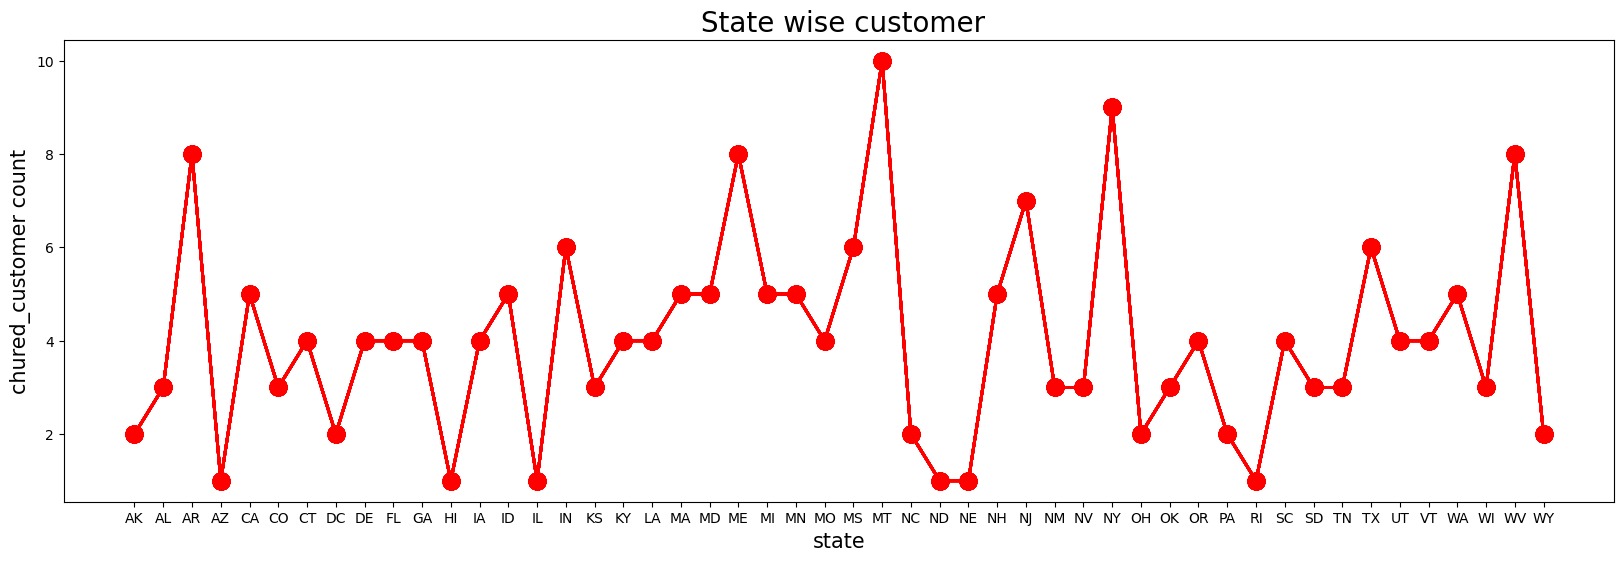

In [56]:

s2=custcall_churn.groupby(['state']).count()

plt.rcParams['figure.figsize'] = (20, 6)

plt.plot(s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" State wise customer", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('chured_customer count', fontsize = 15)
plt.show()

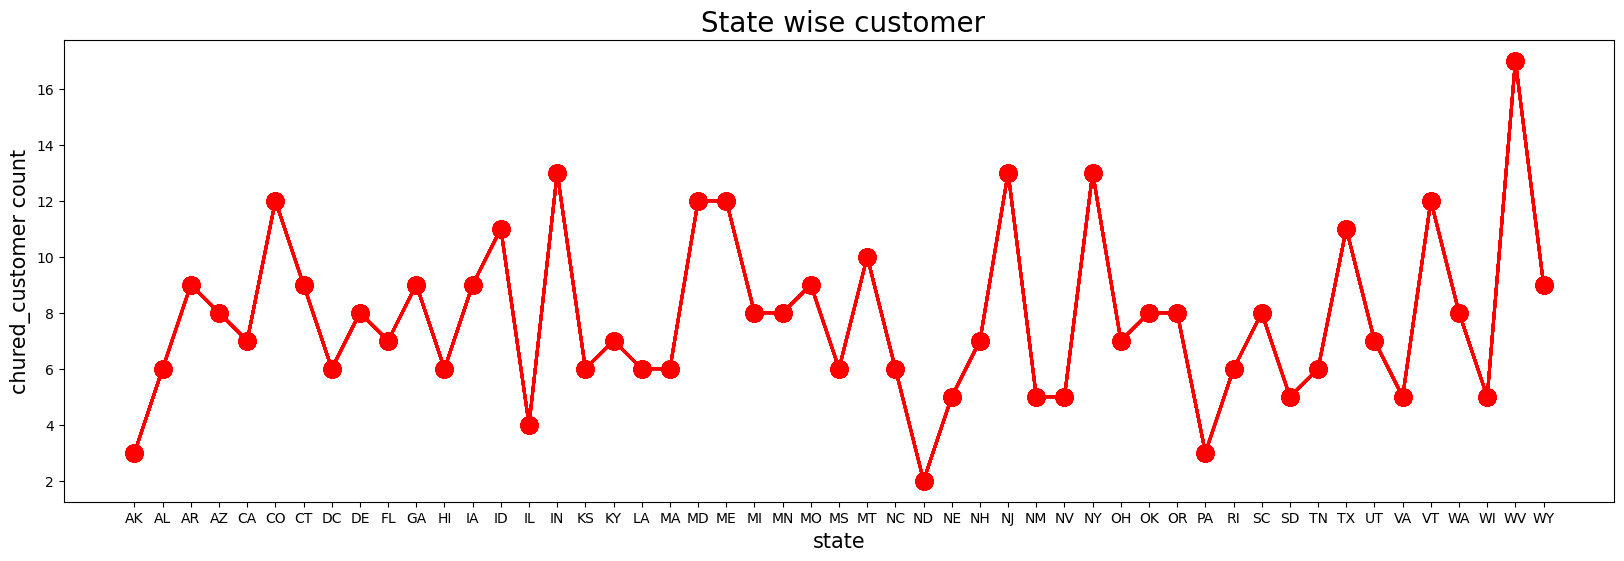

In [45]:
s2=custcall_churned.groupby(['state']).count()

plt.rcParams['figure.figsize'] = (20, 6)

plt.plot(s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" State wise customer", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('chured_customer count', fontsize = 15)
plt.show()

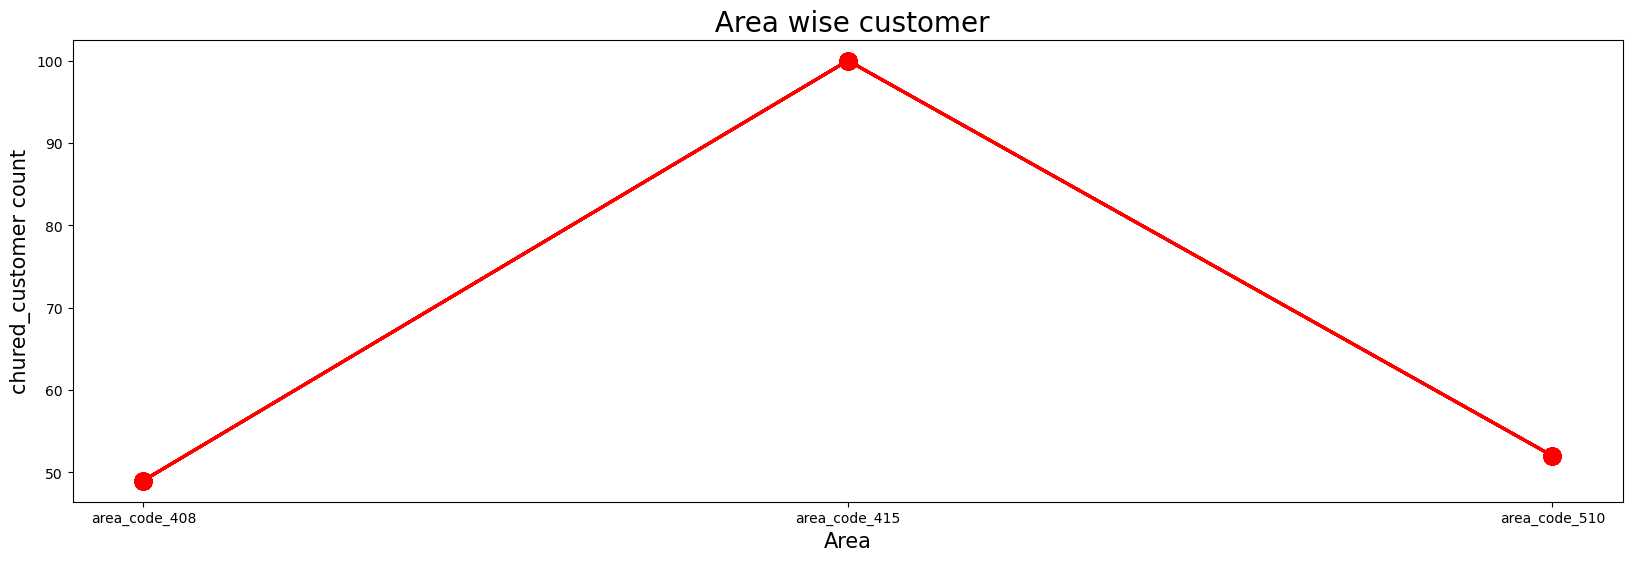

In [46]:
s2=custcall_churn.groupby(['area.code']).count()

plt.rcParams['figure.figsize'] = (20, 6)

plt.plot(s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" Area wise customer", fontsize = 20)
plt.xlabel('Area', fontsize = 15)
plt.ylabel('chured_customer count', fontsize = 15)
plt.show()

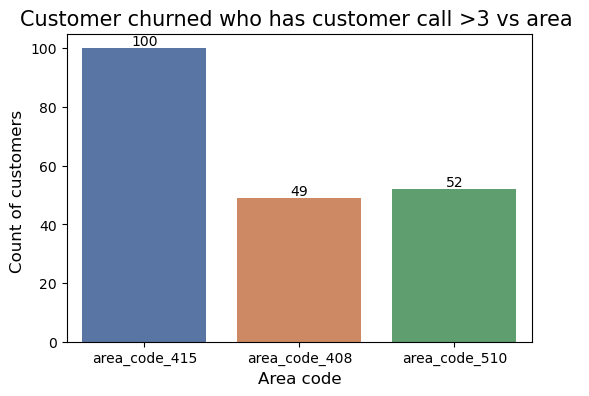

In [51]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x = custcall_churn['area.code'],palette='deep')
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Area code', fontsize= 12)
plt.ylabel('Count of customers ', fontsize= 12)
plt.title("Customer churned who has customer call >3 vs area ",fontsize= 15)
plt.show()

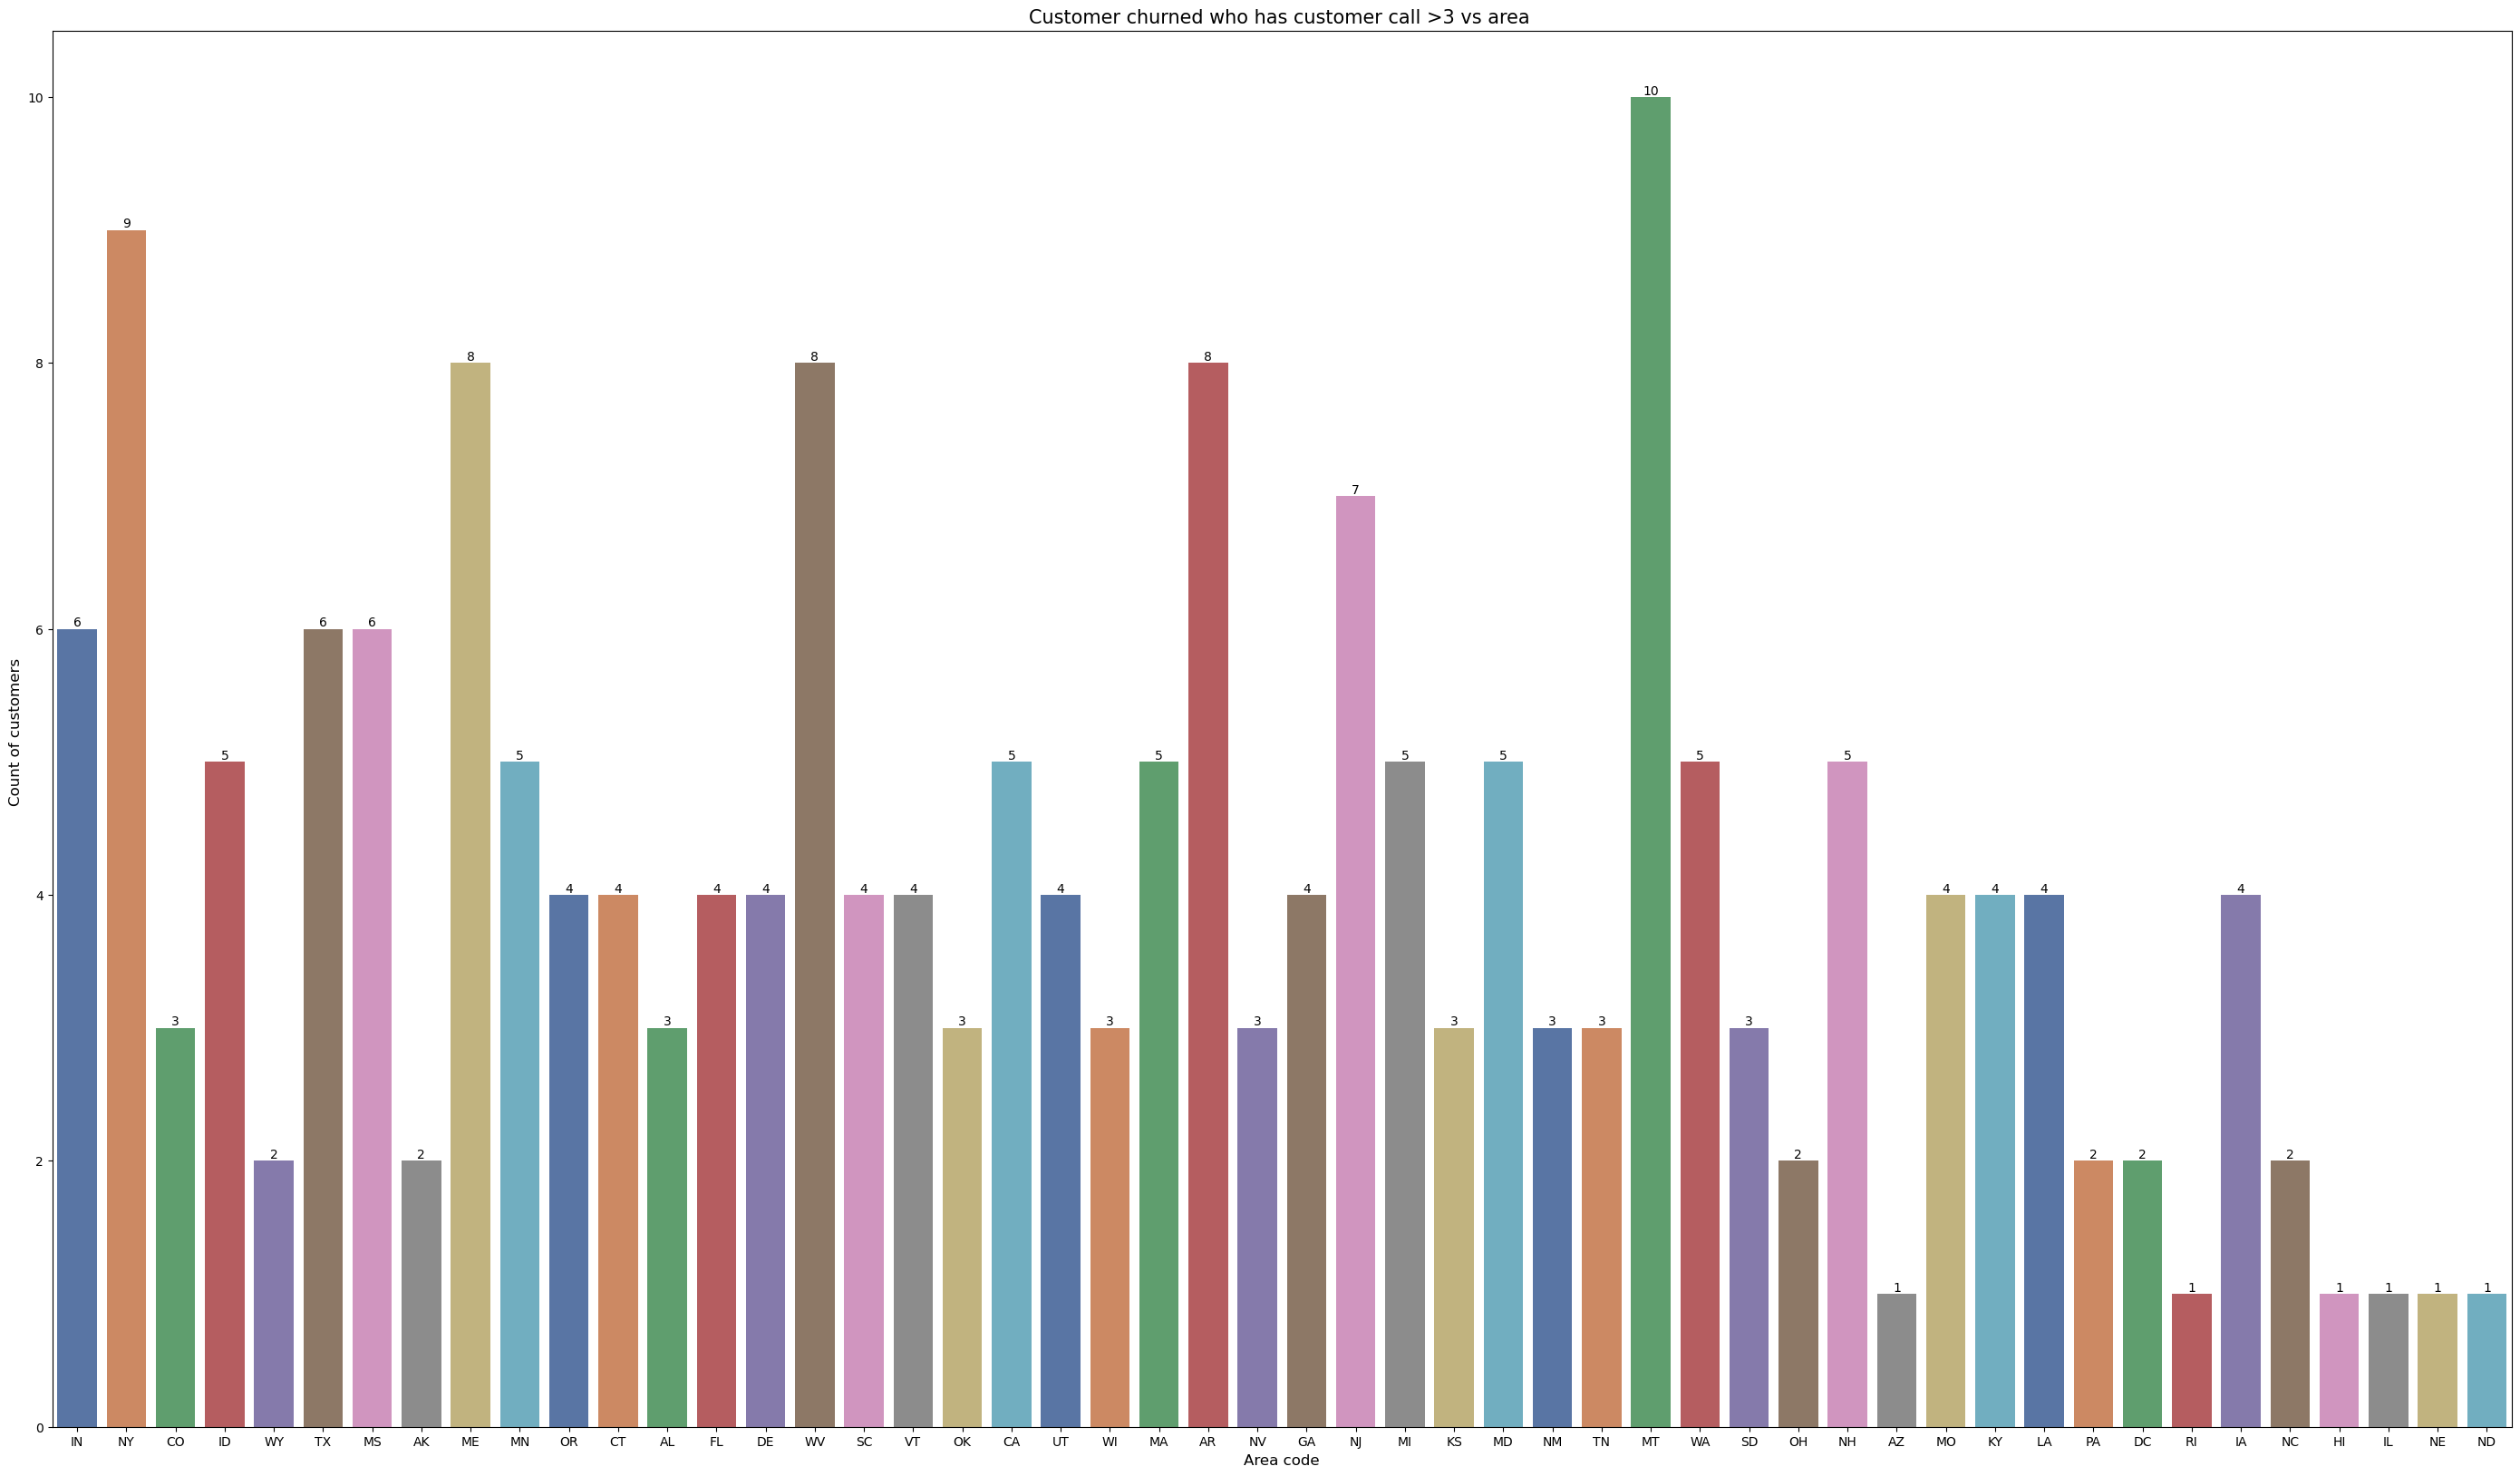

In [53]:
fig, ax = plt.subplots(figsize=(35,20))
sns.countplot(x = custcall_churn['state'],palette='deep')
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Area code', fontsize= 12)
plt.ylabel('Count of customers ', fontsize= 12)
plt.title("Customer churned who has customer call >3 vs area ",fontsize= 15)
plt.show()